In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
import colorama
from colorama import Fore, Style  # makes strings colored

#!pip install termcolor
from termcolor import colored
# colored function from the termcolor module is used to print text in color 

In [3]:
from nltk.corpus import stopwords

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [5]:
from wordcloud import WordCloud 

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [10]:
from yellowbrick.classifier import PrecisionRecallCurve

###### Import Data

In [11]:
rev_df = pd.read_excel("C://Users//sandisk//Downloads//ML using Python//Case Studies//15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform//Womens Clothing Reviews Data.xlsx//")

In [12]:
rev_df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


##### Data Summary

In [13]:
def summary_df(rev_df):
    
    #Printing the shape of the DataFrame
    print(colored("Shape:", attrs=['bold']), rev_df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          
          #Prints "Info:" in bold.
          colored("\nInfo:\n", attrs=['bold']), sep='')
    
    #Printing the DataFrame info
    print(rev_df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    
    #Printing the number of unique values in each column
    print(colored("Number of Uniques:\n", attrs=['bold']), rev_df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    
    #Printing the missing values
    print(colored("Missing Values:\n", attrs=['bold']), rev_df.isnull().sum().sort_values(ascending = False),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    
    #Printing the column names
    print(colored("All Columns:", attrs=['bold']), list(rev_df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    
    #Renaming the columns
    rev_df.columns= rev_df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    #Printing the renamed columns
    print(colored("Columns after rename:", attrs=['bold']), list(rev_df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    

In [14]:
summary_df(rev_df)

Shape:(23486, 11)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB
None
-------------------------------------------------------------------------------
Number of Uniques:
Product ID         1206
Category              3
Subcategory1

In [15]:
rev_df.sample(2)

,product_id,category,subcategory1,subcategory2,location,channel,customer_age,review_title,review_text,rating,recommend_flag
21405,903,General,Tops,Fine gauge,Mumbai,Web,23,Nice cardigan,This is a nice sweater. very soft and while ca...,5,1
14782,1089,General,Dresses,Dresses,Mumbai,Web,21,Gorgeous classic,I ordered this dress in a size 12. i'm 5'9'' a...,5,1


In [16]:
rev_df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,23486.0,918.118709,203.298980,0.0,861.0,936.0,1078.0,1205.0
customer_age,23486.0,43.198544,12.279544,18.0,34.0,41.0,52.0,99.0
rating,23486.0,4.196032,1.110031,1.0,4.0,5.0,5.0,5.0
recommend_flag,23486.0,0.822362,0.382216,0.0,1.0,1.0,1.0,1.0


In [17]:
rev_df.describe(include = "object").T

,count,unique,top,freq
category,23472,3,General,13850
subcategory1,23472,6,Tops,10468
subcategory2,23472,20,Dresses,6319
location,23486,4,Gurgaon,8821
channel,23486,2,Web,13583
review_title,19676,13993,Love it!,136
review_text,22641,22634,Perfect fit and i've gotten so many compliment...,3


<Axes: >

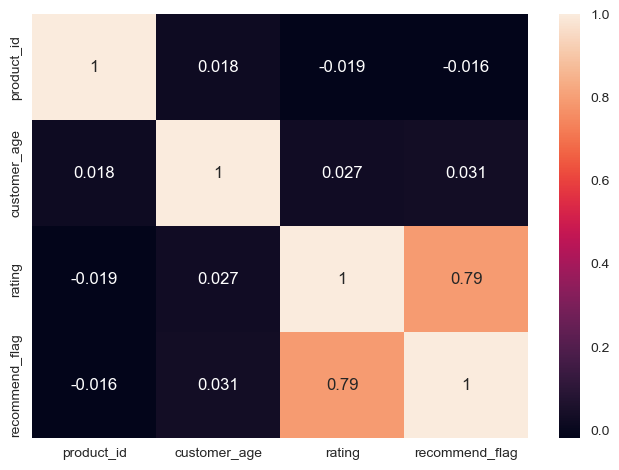

In [18]:
sns.heatmap(rev_df.select_dtypes(exclude = object).corr(),annot=True)

##### Target Variable

In [19]:
print(colored("Target Column", 'blue', attrs=['bold']))
rev_df['recommend_flag'].describe()

Target Column


count    23486.000000
mean         0.822362
std          0.382216
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: recommend_flag, dtype: float64

###### The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

Text(0.5, 1.0, 'Customer Recommendation Distribution')

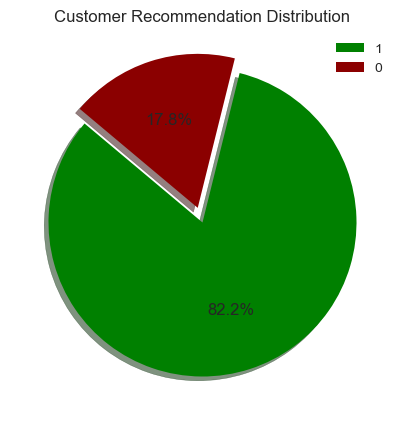

In [20]:
explode = [0, 0.1]

plt.figure(figsize = (5,5))
plt.pie(rev_df['recommend_flag'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140, colors = ['green','darkred'])
plt.legend(labels=['1', '0'])
plt.title('Customer Recommendation Distribution')


The target variable, "recommend_flag", in this study is imblanced so this researcher will concentrate Recall score on evaluating the results rather than Accuracy score used in the evaluation of balanced data.

##### Customers Age

In [21]:
print("Null Values: ",rev_df['customer_age'].isnull().sum())
print("No. of Uniques: ",rev_df['customer_age'].nunique())
print("Value Counts: ",rev_df['customer_age'].value_counts())

Null Values:  0
No. of Uniques:  77
Value Counts:  customer_age
39    1269
35     909
36     842
34     804
38     780
      ... 
93       2
90       2
86       2
99       2
92       1
Name: count, Length: 77, dtype: int64


In [22]:
rev_df['customer_age'].describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: customer_age, dtype: float64

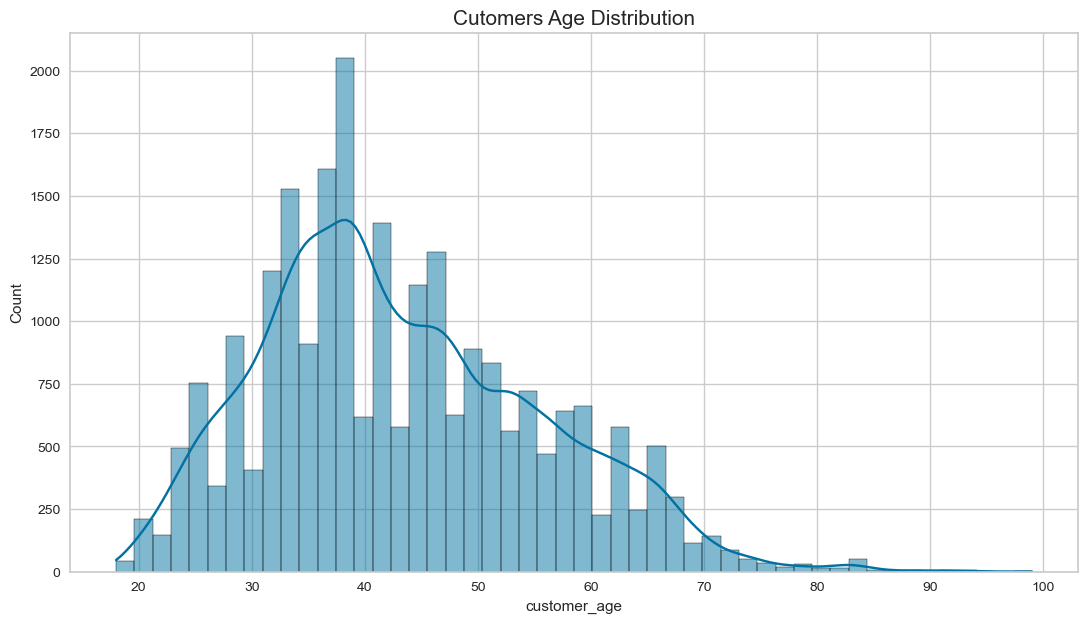

In [23]:
plt.figure(figsize = (13,7))
plt.title("Cutomers Age Distribution", fontsize = 15)
plt.grid(True)
sns.histplot(x = rev_df['customer_age'], data = rev_df, bins = 50, kde = True)
plt.show()

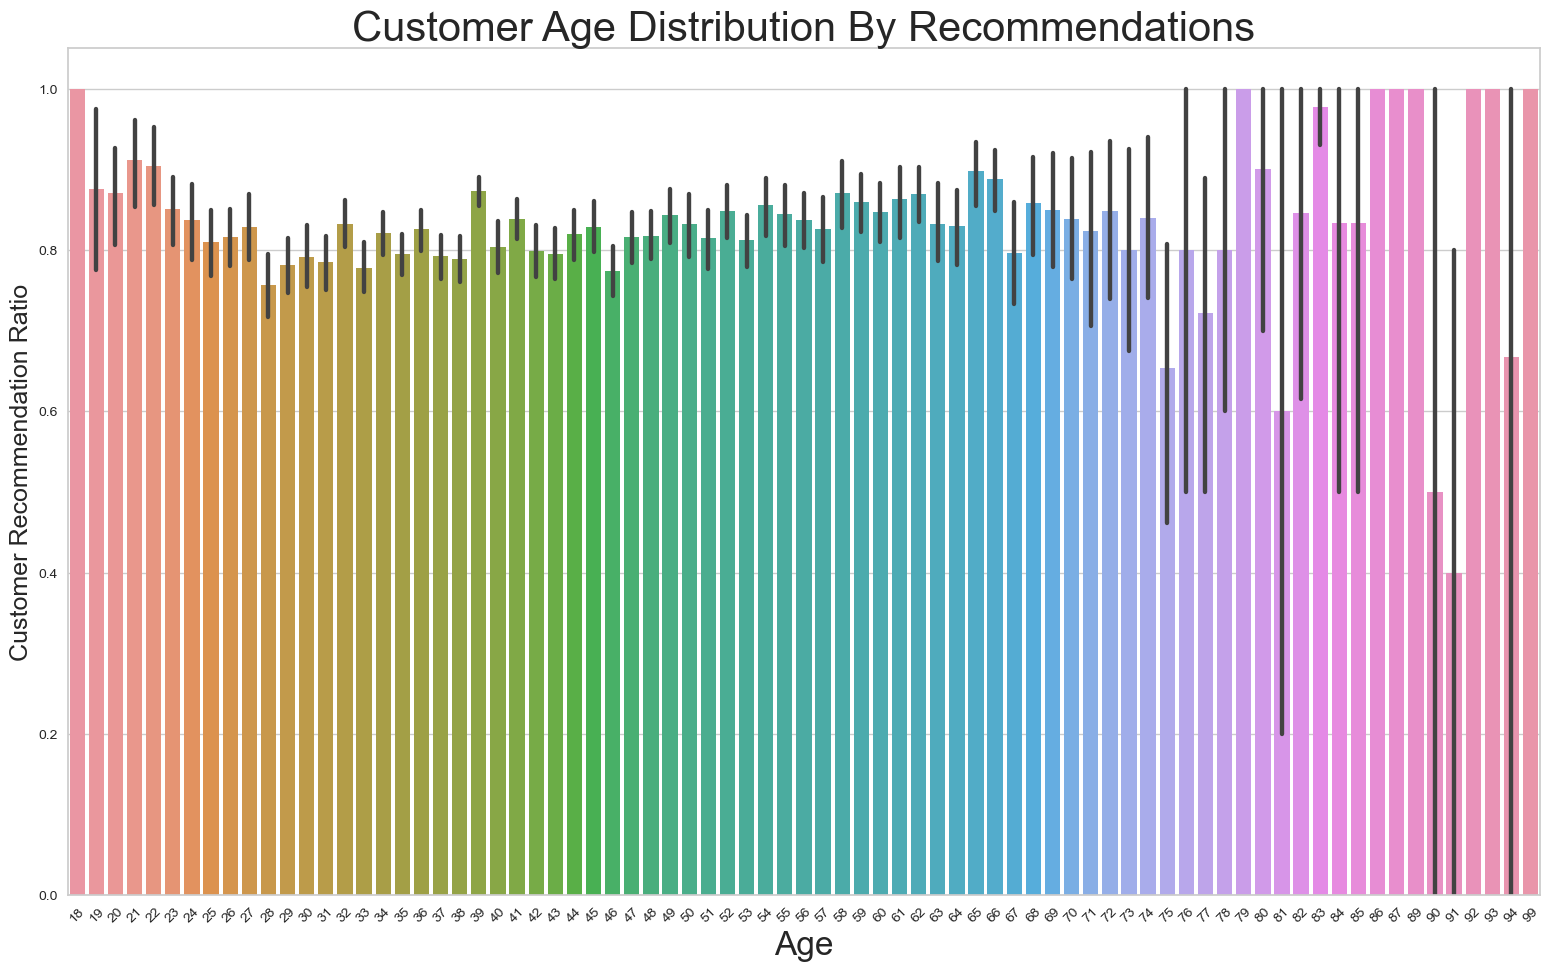

In [24]:
plt.figure(figsize = (19,11))
sns.barplot(data = rev_df, x = "customer_age", y = "recommend_flag")
plt.title('Customer Age Distribution By Recommendations', fontsize=30)
plt.xlabel("Age", fontsize=24)
plt.ylabel("Customer Recommendation Ratio", fontsize=18)
plt.xticks(rotation = 45)
plt.show()

##### Location

In [25]:
print("Null Values: ",rev_df['location'].isnull().sum())
print("Unique Values: ",rev_df["location"].nunique())
print("Value Counts: ",rev_df["location"].value_counts())

Null Values:  0
Unique Values:  4
Value Counts:  location
Gurgaon      8821
Mumbai       7112
Bangalore    5224
Chennai      2329
Name: count, dtype: int64


In [26]:
rev_df['location'].describe()

count       23486
unique          4
top       Gurgaon
freq         8821
Name: location, dtype: object

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


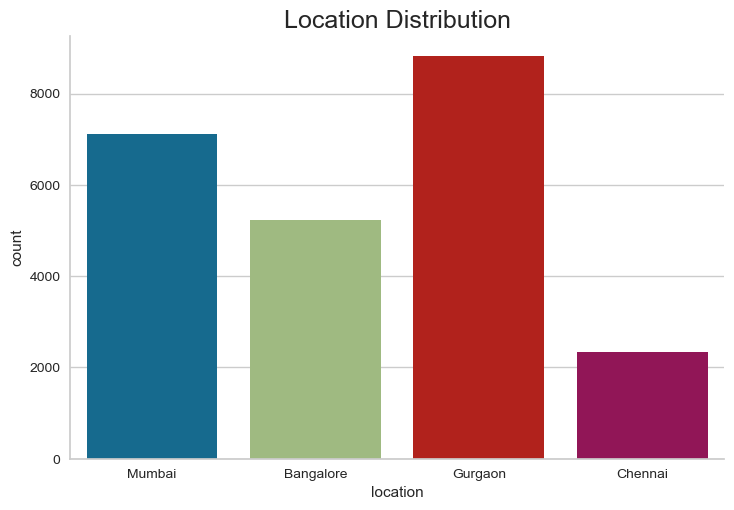

In [27]:
sns.catplot(x='location',kind="count", data=rev_df, height=5, aspect=1.5)
plt.title('Location Distribution', fontsize=18)

plt.show()

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


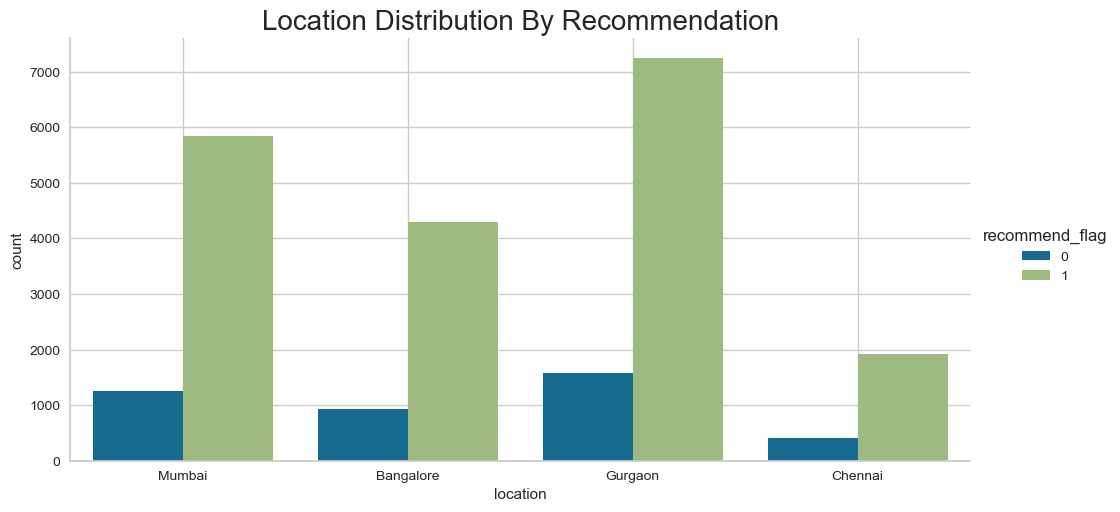

In [28]:
sns.catplot(data = rev_df, x ="location", hue = "recommend_flag", kind='count', height=5, aspect=2)
plt.grid(True)
plt.title('Location Distribution By Recommendation', fontsize=20)
plt.show()

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x700 with 0 Axes>

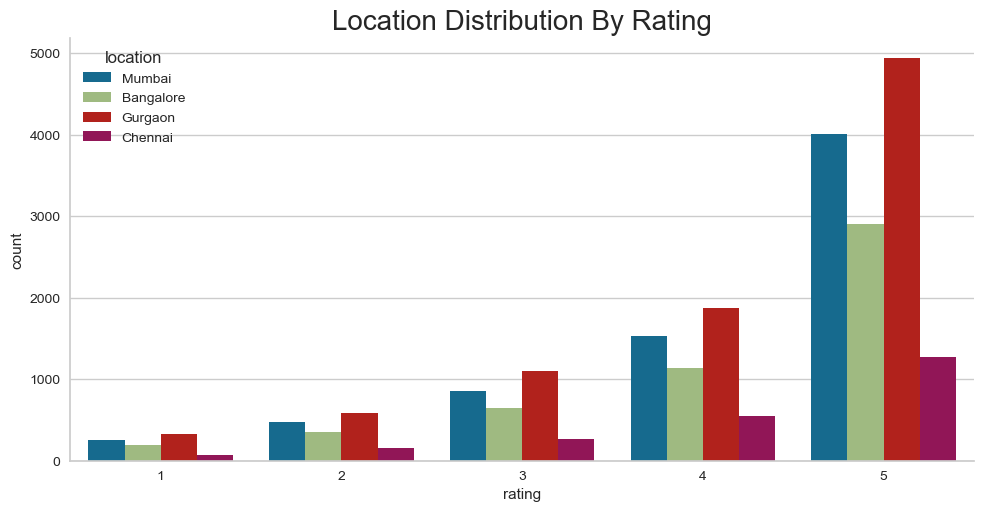

In [29]:
plt.figure(figsize = (15,7))
sns.catplot(data = rev_df, x ="rating", hue = "location", kind='count', height=5, aspect=2, legend_out=False)

plt.title('Location Distribution By Rating', fontsize=20)
plt.show()

##### Category

In [30]:
print("Null Values: ",rev_df['category'].isnull().sum())
print("Unique Values: ",rev_df["category"].nunique())
print("Value Counts: ",rev_df["category"].value_counts())

Null Values:  14
Unique Values:  3
Value Counts:  category
General           13850
General Petite     8120
Initmates          1502
Name: count, dtype: int64


In [31]:
rev_df['category'].describe()

count       23472
unique          3
top       General
freq        13850
Name: category, dtype: object

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


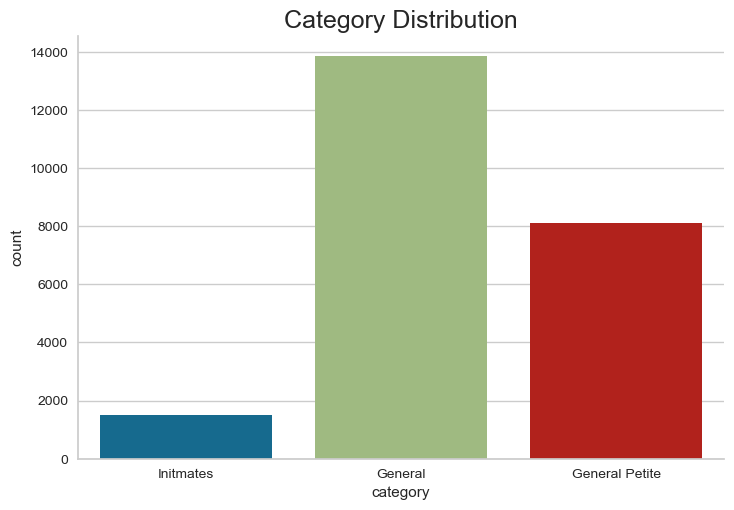

<Figure size 1100x700 with 0 Axes>

In [32]:
sns.catplot(x='category',kind="count", data=rev_df, height=5,aspect = 1.5)
plt.title('Category Distribution', fontsize=18)
plt.figure(figsize = (11,7))
plt.show()

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


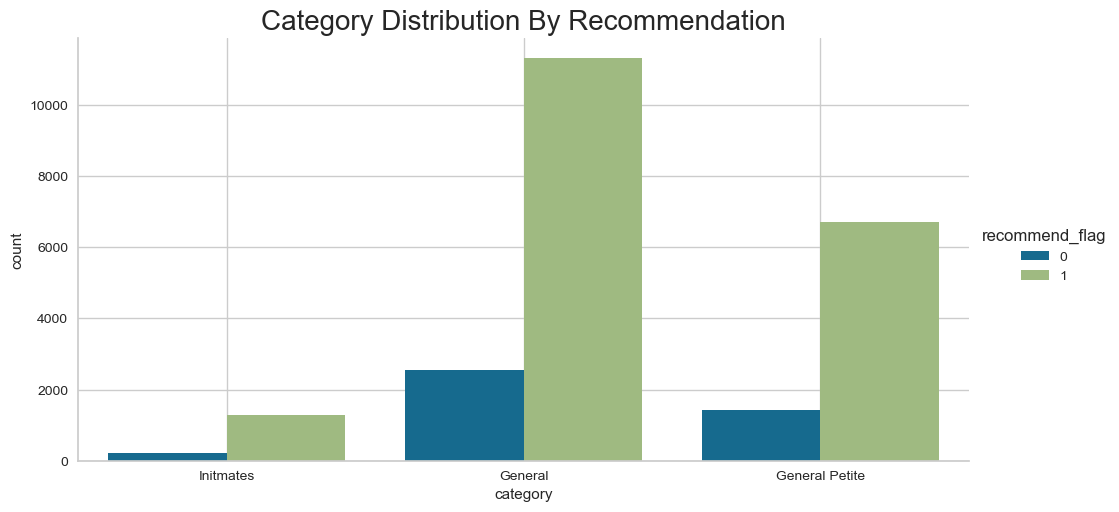

In [33]:
sns.catplot(data = rev_df, x ="category", hue = "recommend_flag", kind='count', height=5, aspect=2)
plt.grid(True)
plt.title('Category Distribution By Recommendation', fontsize=20)
plt.show()

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x700 with 0 Axes>

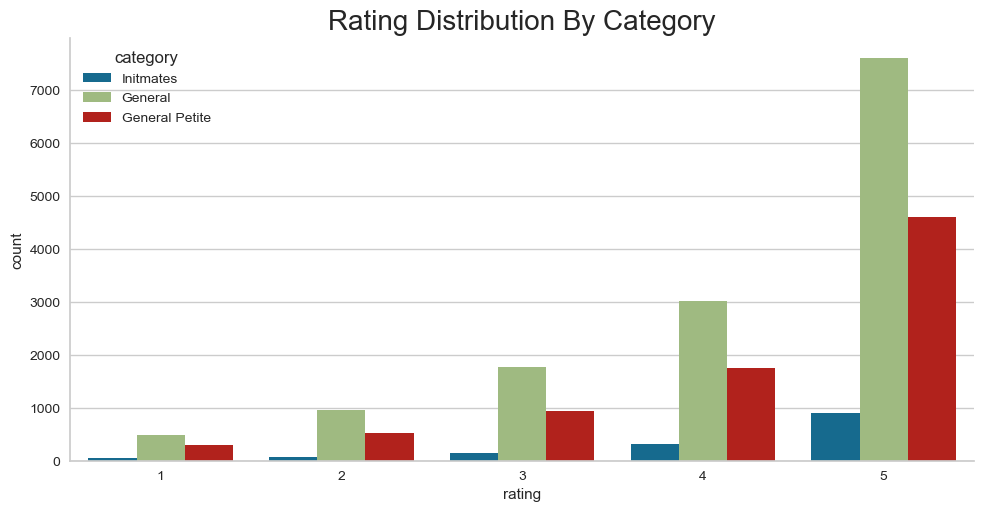

In [34]:
plt.figure(figsize = (15,7))
sns.catplot(data = rev_df, x ="rating", hue = "category", kind='count', height=5, aspect=2, legend_out=False)

plt.title('Rating Distribution By Category', fontsize=20)
plt.show()

##### Sub Category 1

In [35]:
print("Null Values: ",rev_df['subcategory1'].isnull().sum())
print("Unique Values: ",rev_df["subcategory1"].nunique())
print("Value Counts: ",rev_df["subcategory1"].value_counts())

Null Values:  14
Unique Values:  6
Value Counts:  subcategory1
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: count, dtype: int64


In [36]:
rev_df["category"].describe()

count       23472
unique          3
top       General
freq        13850
Name: category, dtype: object

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


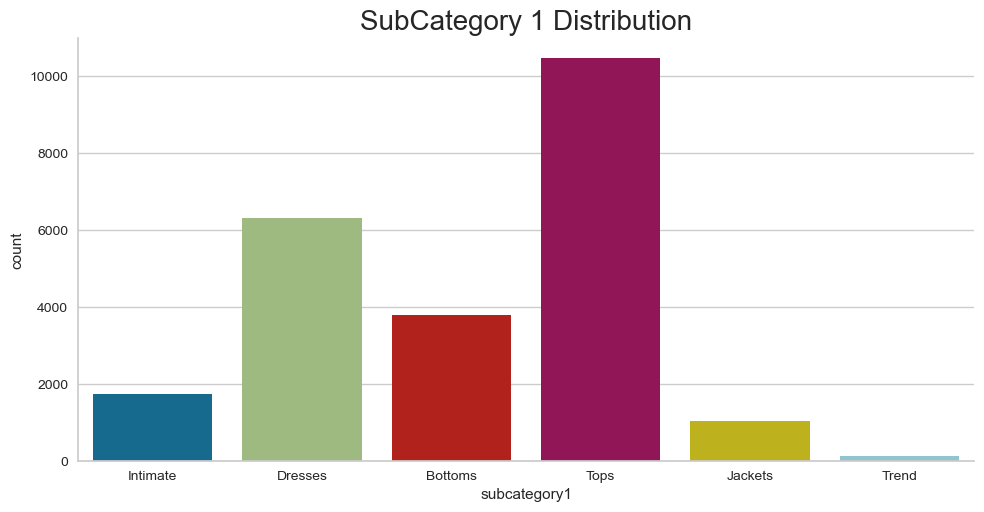

In [37]:
sns.catplot(data = rev_df, x ="subcategory1", kind='count', height=5, aspect=2)

plt.title('SubCategory 1 Distribution', fontsize=20)
plt.show()

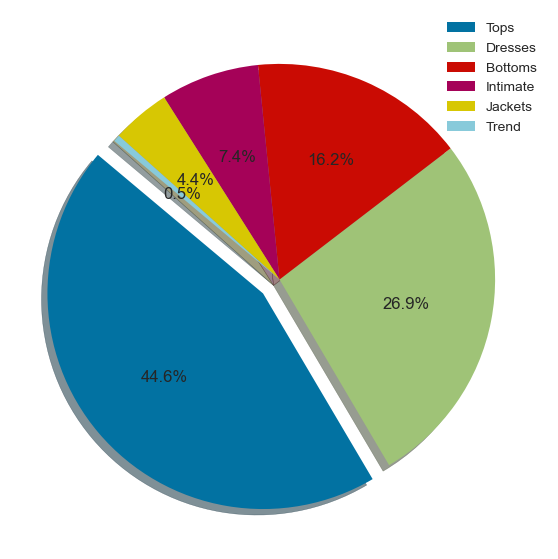

In [38]:
explode = [0.1, 0, 0, 0, 0, 0]
plt.figure(figsize=(7,7))
plt.pie(rev_df['subcategory1'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Tops', 'Dresses', 'Bottoms', 'Intimate', 'Jackets', 'Trend'], loc = 'upper right')
plt.show()

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


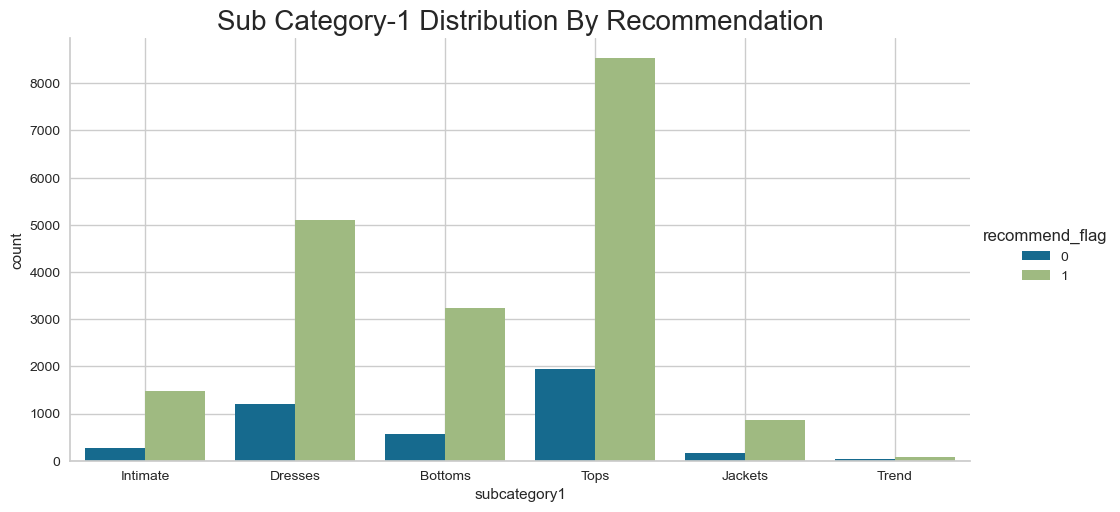

In [39]:
sns.catplot(data = rev_df, x ="subcategory1", hue = "recommend_flag", kind='count', height=5, aspect=2)
plt.grid(True)
plt.title('Sub Category-1 Distribution By Recommendation', fontsize=20)
plt.show()

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x700 with 0 Axes>

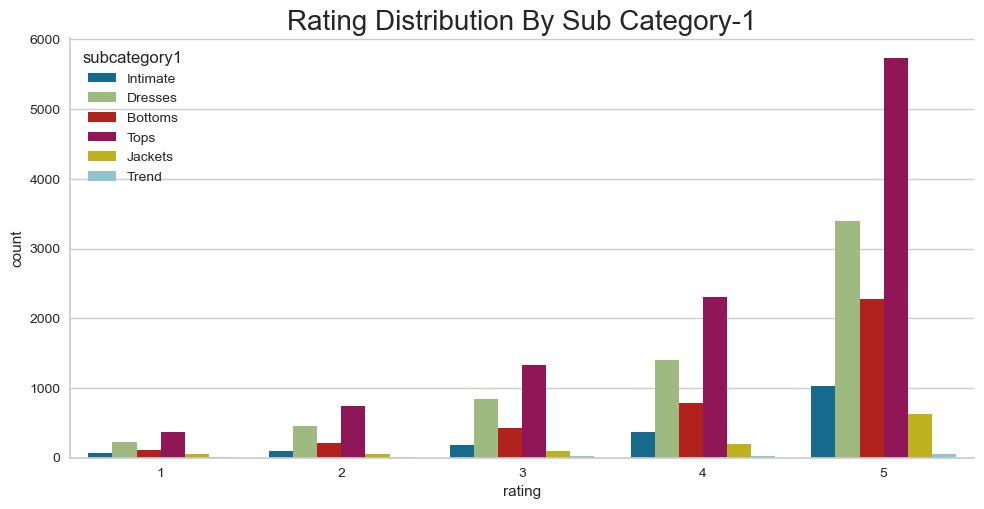

In [40]:
plt.figure(figsize = (15,7))
sns.catplot(data = rev_df, x ="rating", hue = "subcategory1", kind='count', height=5, aspect=2, legend_out=False)

plt.title('Rating Distribution By Sub Category-1', fontsize=20)
plt.show()

##### Sub Category 2

In [41]:
print("Null Values: ",rev_df['subcategory2'].isnull().sum())
print("Unique Values: ",rev_df["subcategory2"].nunique())
print("Value Counts: ",rev_df["subcategory2"].value_counts())

Null Values:  14
Unique Values:  20
Value Counts:  subcategory2
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64


In [42]:
rev_df['subcategory2'].describe()

count       23472
unique         20
top       Dresses
freq         6319
Name: subcategory2, dtype: object

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


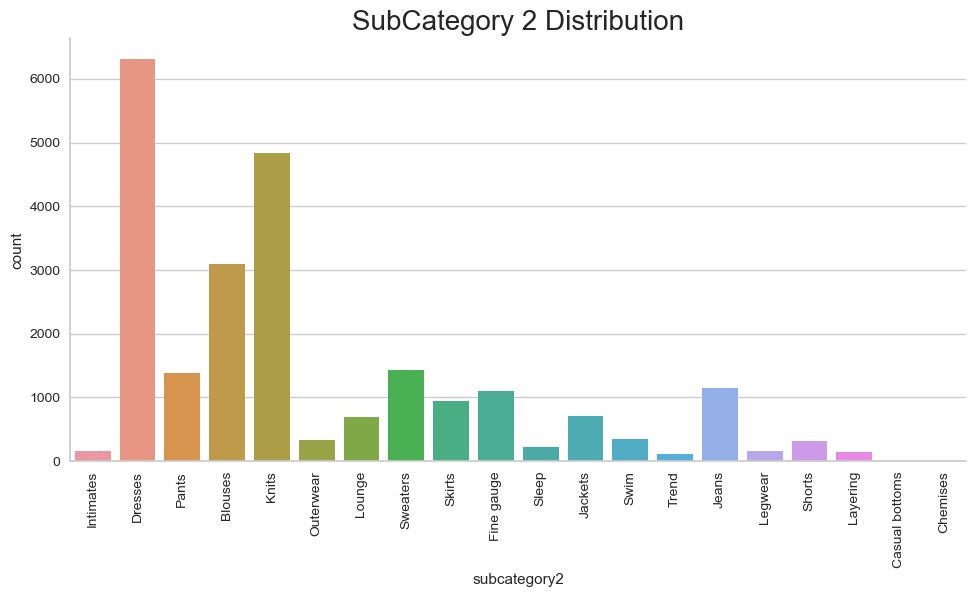

In [43]:
sns.catplot(data = rev_df, x ="subcategory2", kind='count', height=5, aspect=2)

plt.title('SubCategory 2 Distribution', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

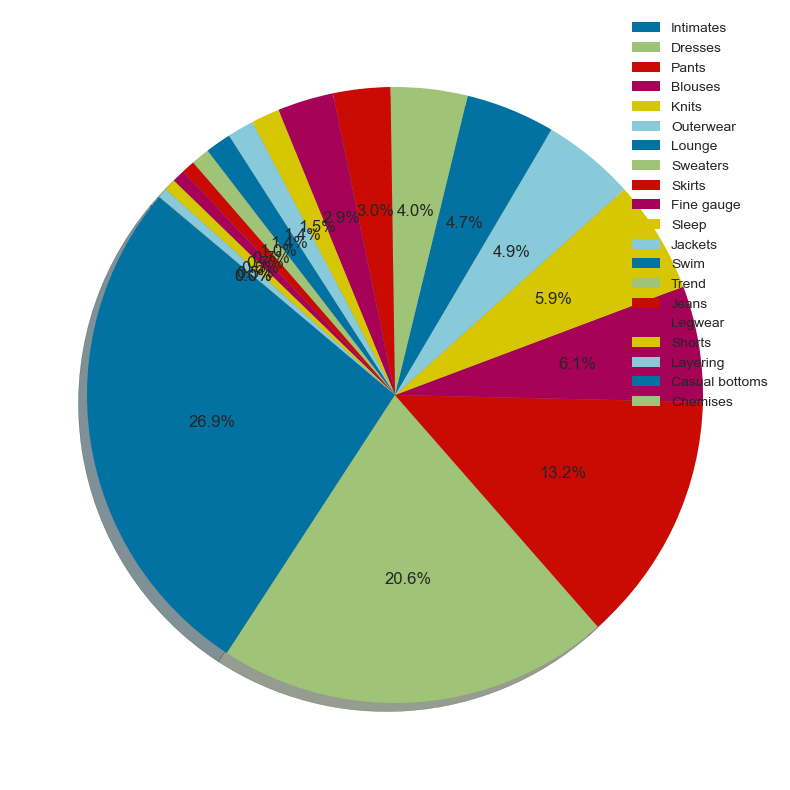

In [44]:

plt.figure(figsize=(10,10))
plt.pie(rev_df['subcategory2'].value_counts(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels = ['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises'],loc = 'upper right')
plt.show()

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1700x1100 with 0 Axes>

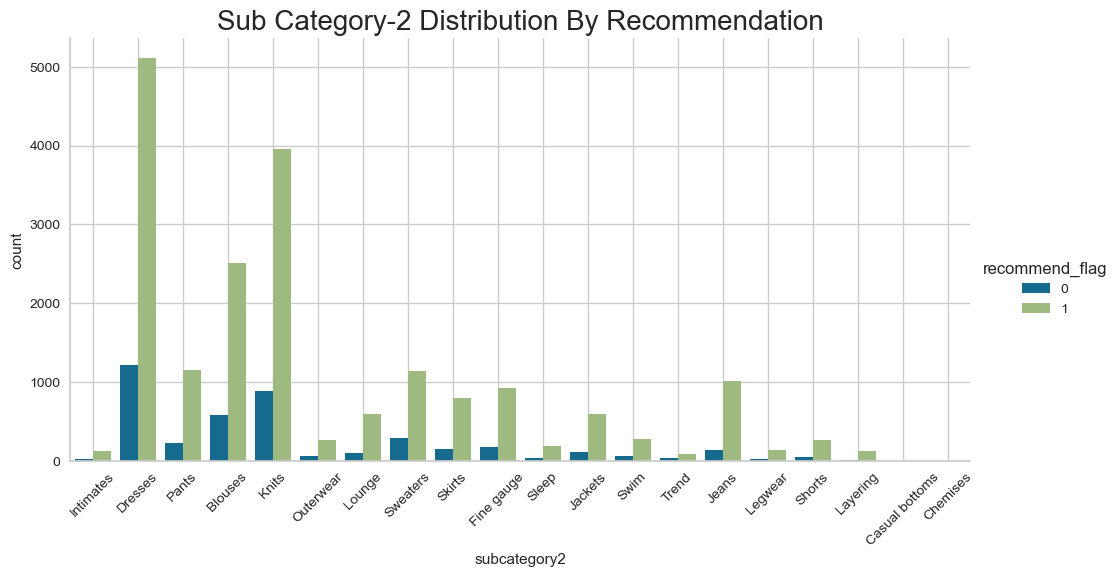

In [45]:
plt.figure(figsize = (17,11))
sns.catplot(data = rev_df, x ="subcategory2", hue = "recommend_flag", kind='count', height=5, aspect=2)
plt.grid(True)
plt.title('Sub Category-2 Distribution By Recommendation', fontsize=20)
plt.xticks(rotation = 45)
plt.show()

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x700 with 0 Axes>

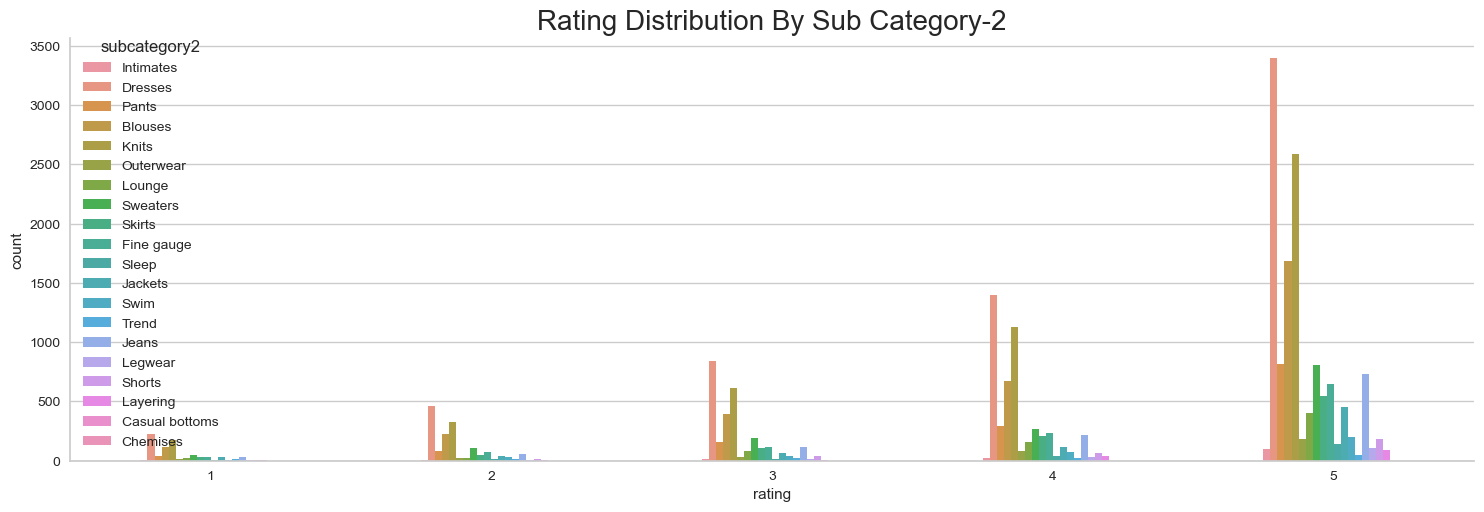

In [46]:
plt.figure(figsize = (15,7))
sns.catplot(data = rev_df, x ="rating", hue = "subcategory2", kind='count', height=5, aspect=3, legend_out=False, width = 0.5)

plt.title('Rating Distribution By Sub Category-2', fontsize=20)
plt.show()

##### Channel

In [47]:
print("Null Values: ",rev_df['channel'].isnull().sum())
print("Unique Values: ",rev_df["channel"].nunique())
print("Value Counts: ",rev_df["channel"].value_counts())

Null Values:  0
Unique Values:  2
Value Counts:  channel
Web       13583
Mobile     9903
Name: count, dtype: int64


In [48]:
rev_df["channel"].describe()

count     23486
unique        2
top         Web
freq      13583
Name: channel, dtype: object

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


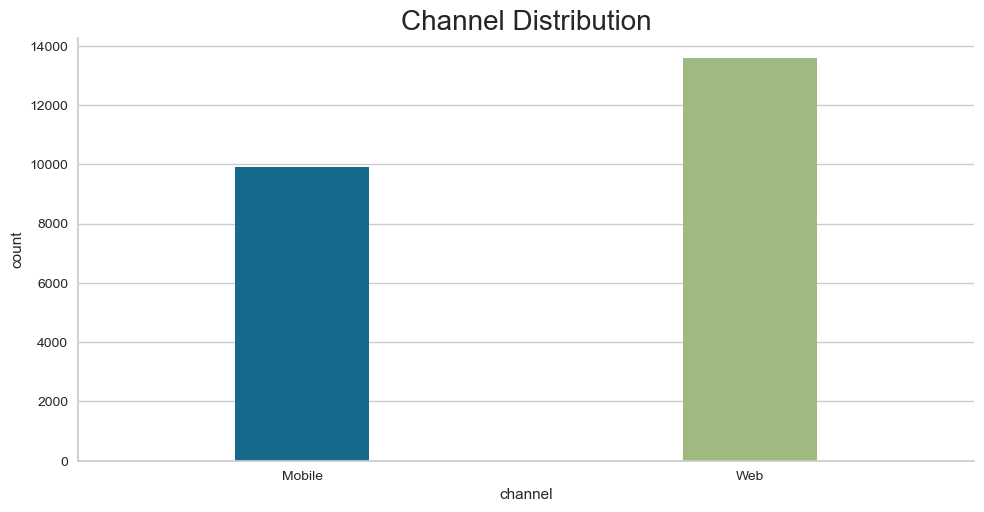

In [49]:
sns.catplot(data = rev_df, x ="channel", kind='count', height=5, aspect = 2, width = 0.3)

plt.title('Channel Distribution', fontsize=20)
plt.show()

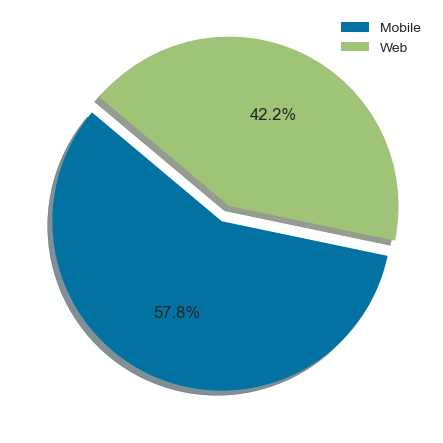

In [50]:
explode = [0,0.1]
plt.pie(rev_df['channel'].value_counts(),explode = explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels = ["Mobile","Web"],loc = 'upper right')
plt.show()

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


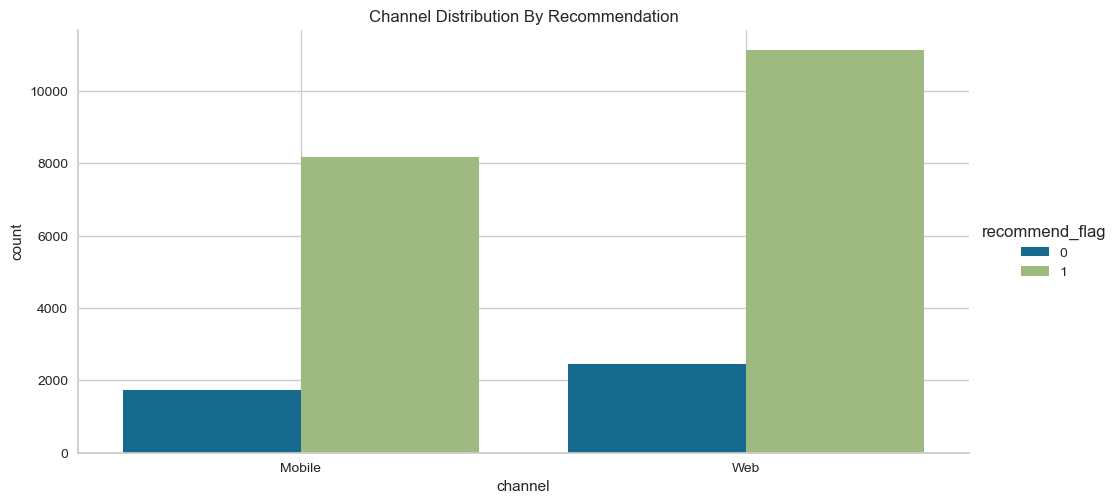

In [51]:
sns.catplot(data = rev_df, x ="channel", hue = "recommend_flag", kind='count', height=5, aspect=2)
plt.grid(True)
plt.title('Channel Distribution By Recommendation')
plt.show()

C:\Users\sandisk\AnacondaPy\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x700 with 0 Axes>

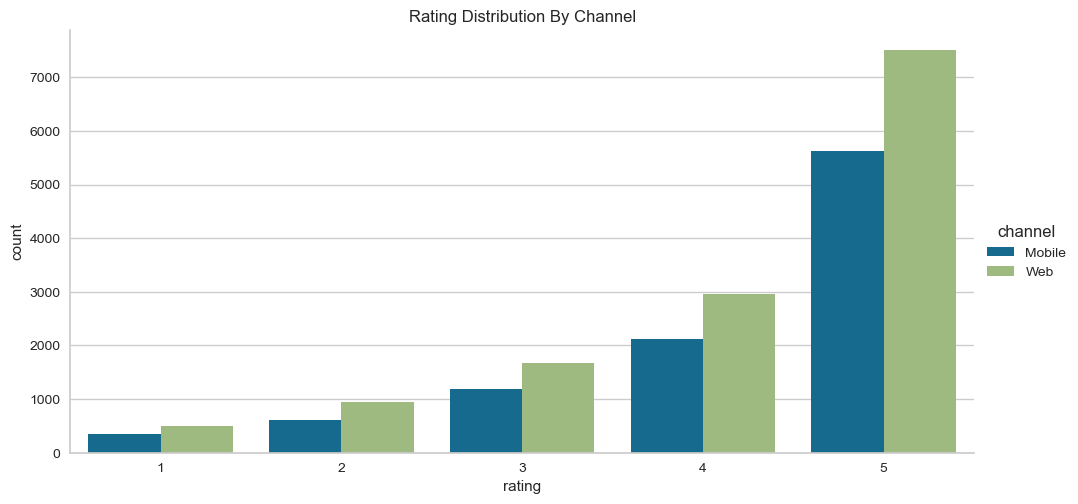

In [52]:
plt.figure(figsize = (15,7))
sns.catplot(data = rev_df, x ="rating", hue = "channel", kind='count',aspect = 2)

plt.title('Rating Distribution By Channel')
plt.show()

##### categorical and numerical sets for the examination of crosstab information.

In [53]:
rev_df_cat = rev_df[["category","subcategory1","subcategory2","location","channel","recommend_flag"]]
rev_df_cat["recommend_flag"] = rev_df_cat["recommend_flag"].apply(lambda x: "Recommended" if x>=1 else "Not Recommended")
rev_df_cat

C:\Users\sandisk\AppData\Local\Temp\ipykernel_6904\2487355283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_df_cat["recommend_flag"] = rev_df_cat["recommend_flag"].apply(lambda x: "Recommended" if x>=1 else "Not Recommended")


,category,subcategory1,subcategory2,location,channel,recommend_flag
0,Initmates,Intimate,Intimates,Mumbai,Mobile,Recommended
1,General,Dresses,Dresses,Bangalore,Mobile,Recommended
2,General,Dresses,Dresses,Gurgaon,Mobile,Not Recommended
3,General Petite,Bottoms,Pants,Chennai,Web,Recommended
4,General,Tops,Blouses,Bangalore,Web,Recommended
...,...,...,...,...,...,...
23481,General Petite,Dresses,Dresses,Gurgaon,Mobile,Recommended
23482,General Petite,Tops,Knits,Gurgaon,Web,Recommended
23483,General Petite,Dresses,Dresses,Gurgaon,Web,Not Recommended
23484,General,Dresses,Dresses,Gurgaon,Web,Recommended


In [54]:
rev_df_num = rev_df[["customer_age","rating","recommend_flag"]]
rev_df_num["recommend_flag"] = rev_df_num["recommend_flag"].apply(lambda x: "Recommended" if x>=1 else "Not Recommended")
rev_df_num

C:\Users\sandisk\AppData\Local\Temp\ipykernel_6904\3608309690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_df_num["recommend_flag"] = rev_df_num["recommend_flag"].apply(lambda x: "Recommended" if x>=1 else "Not Recommended")


,customer_age,rating,recommend_flag
0,33,4,Recommended
1,34,5,Recommended
2,60,3,Not Recommended
3,50,5,Recommended
4,47,5,Recommended
...,...,...,...
23481,34,5,Recommended
23482,48,3,Recommended
23483,31,3,Not Recommended
23484,28,3,Recommended


In [55]:
for i, col in enumerate(rev_df_cat.columns):
    xtab = pd.crosstab(rev_df_cat[col], rev_df_cat["recommend_flag"], normalize=True)
    print(colored('-'*55, 'red', attrs=['bold']), sep='')
    print(xtab*100)

-------------------------------------------------------
recommend_flag  Not Recommended  Recommended
category                                    
General               10.808623    48.197853
General Petite         6.019939    28.574472
Initmates              0.945808     5.453306
-------------------------------------------------------
recommend_flag  Not Recommended  Recommended
subcategory1                                
Bottoms                2.407123    13.778119
Dresses                5.163599    21.757839
Intimate               1.107703     6.284083
Jackets                0.720007     3.676721
Tops                   8.243865    36.353954
Trend                  0.132072     0.374915
-------------------------------------------------------
recommend_flag  Not Recommended  Recommended
subcategory2                                
Blouses                2.505112    10.689332
Casual bottoms         0.000000     0.008521
Chemises               0.000000     0.004260
Dresses               

In [56]:
for i, col in enumerate(rev_df_num.columns):
    xtab = pd.crosstab(rev_df_num[col], rev_df_num["recommend_flag"], normalize=True)
    print(colored('-'*55, 'red', attrs=['bold']), sep='')
    print(xtab*100)

-------------------------------------------------------
recommend_flag  Not Recommended  Recommended
customer_age                                
18                     0.000000     0.017031
19                     0.021289     0.149025
20                     0.059610     0.400238
21                     0.038321     0.395981
22                     0.059610     0.562037
...                         ...          ...
91                     0.012774     0.008516
92                     0.000000     0.004258
93                     0.000000     0.008516
94                     0.004258     0.008516
99                     0.000000     0.008516

[77 rows x 2 columns]
-------------------------------------------------------
recommend_flag  Not Recommended  Recommended
rating                                      
1                      3.516989     0.068126
2                      6.263306     0.400238
3                      7.161713     5.062590
4                      0.715320    20.901814
5         

##### Feature Selection

In [57]:
rev_df.columns

Index(['product_id', 'category', 'subcategory1', 'subcategory2', 'location',
       'channel', 'customer_age', 'review_title', 'review_text', 'rating',
       'recommend_flag'],
      dtype='object')

In [58]:
rev_df.drop(["product_id","category","subcategory1","subcategory2","location","channel","customer_age","review_title","rating"],
           axis = 1, inplace = True)

In [59]:
rev_df.head()

,review_text,recommend_flag
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


##### Detecting & Handling With Missing Values

In [60]:
print("No.of Missing Values in Review Text: ",rev_df["review_text"].isnull().sum())

No.of Missing Values in Review Text:  845


In [61]:
print("No.of Missing Values in Recommend Flag: ",rev_df["recommend_flag"].isnull().sum())

No.of Missing Values in Recommend Flag:  0


In [62]:
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_text     22641 non-null  object
 1   recommend_flag  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [63]:
rev_df = rev_df.dropna()

In [64]:
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_text     22641 non-null  object
 1   recommend_flag  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


##### TEXT MINING

###### Tokenization, Noise Removal & Lexicon Normalization

In [65]:
stop_words = set(stopwords.words('english'))

In [66]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [67]:
def cleaning_fsa(data):
    
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','', data)
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [68]:
#1. Remove Puncs
txt = re.sub('[^\w\s]','', str(rev_df["review_text"]))
txt

'0        Absolutely wonderful  silky and sexy and comf\n1        Love this dress  its sooo pretty  i happene\n2        I had such high hopes for this dress and reall\n3        I love love love this jumpsuit its fun fl\n4        This shirt is very flattering to all due to th\n                                                       \n23481    I was very happy to snag this dress at such a \n23482    It reminds me of maternity clothes soft stre\n23483    This fit well but the top was very see throug\n23484    I bought this dress for a wedding i have this \n23485    This dress in a lovely platinum is feminine an\nName review_text Length 22641 dtype object'

In [69]:
#2. Tokenize
text_tokens = word_tokenize(txt.lower()) 
text_tokens

['0',
 'absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 '1',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 '2',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 '3',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 '4',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 '23481',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 '23482',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 '23483',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 '23484',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 '23485',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review_text',
 'length',
 '22641',
 'dtype',
 'object']

In [70]:
#3. Remove numbers
tokens_without_punc = [w for w in text_tokens if w.isalpha()]
tokens_without_punc

['absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'length',
 'dtype',
 'object']

In [71]:
#4. Removing Stopwords
tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
tokens_without_sw

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comf',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happene',
 'high',
 'hopes',
 'dress',
 'reall',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'fl',
 'shirt',
 'flattering',
 'due',
 'th',
 'happy',
 'snag',
 'dress',
 'reminds',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'fit',
 'well',
 'top',
 'see',
 'throug',
 'bought',
 'dress',
 'wedding',
 'dress',
 'lovely',
 'platinum',
 'feminine',
 'name',
 'length',
 'dtype',
 'object']

In [72]:
#5. lemma
text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
text_cleaned

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comf',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happene',
 'high',
 'hope',
 'dress',
 'reall',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'fl',
 'shirt',
 'flattering',
 'due',
 'th',
 'happy',
 'snag',
 'dress',
 'reminds',
 'maternity',
 'clothes',
 'soft',
 'stre',
 'fit',
 'well',
 'top',
 'see',
 'throug',
 'bought',
 'dress',
 'wedding',
 'dress',
 'lovely',
 'platinum',
 'feminine',
 'name',
 'length',
 'dtype',
 'object']

In [73]:
text = cleaning_fsa(str(rev_df["review_text"]))
text

'absolutely wonderful silky sexy comf love dress sooo pretty happene high hope dress reall love love love jumpsuit fun fl shirt flattering due th happy snag dress reminds maternity clothes soft stre fit well top see throug bought dress wedding dress lovely platinum feminine name length dtype object'

In [74]:
rev_df["review_text"] = rev_df["review_text"].apply(cleaning_fsa)
rev_df["review_text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: review_text, dtype: object

In [75]:
rev_df.head()

,review_text,recommend_flag
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


#### Handling With Rare Words

In [76]:
" ".join(rev_df["review_text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'complimen

In [77]:
word_values = pd.Series(" ".join(rev_df["review_text"]).split()).value_counts()
word_values

dress            11294
fit              10072
size              9336
love              8961
top               8230
                 ...  
fabricfit            1
straighthence        1
parallel             1
cartwheel            1
platinum             1
Name: count, Length: 16731, dtype: int64

In [78]:
rare_words = word_values[word_values <= 2]
rare_words

featuring        2
alternation      2
sweaterit        2
veryvery         2
assistance       2
                ..
fabricfit        1
straighthence    1
parallel         1
cartwheel        1
platinum         1
Name: count, Length: 10914, dtype: int64

In [79]:
rare_words.value_counts()

count
1    9034
2    1880
Name: count, dtype: int64

In [80]:
len(rare_words)

10914

In [81]:
rare_words.index

Index(['featuring', 'alternation', 'sweaterit', 'veryvery', 'assistance',
       'photoshopped', 'sienna', 'addict', 'atrocious', 'swingyflared',
       ...
       'mosly', 'joking', 'cuteperfect', 'yellowgoldorange', 'samei',
       'fabricfit', 'straighthence', 'parallel', 'cartwheel', 'platinum'],
      dtype='object', length=10914)

In [82]:
rev_df["review_text"] = rev_df["review_text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
rev_df["review_text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: review_text, dtype: object

In [83]:
rev_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_text     22641 non-null  object
 1   recommend_flag  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [84]:
rev_df.head()

,review_text,recommend_flag
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


#### WORLDCLOUD - REPETITION OF WORDS

##### The Detection of Positive and Negative Reviews

In [85]:
rev_df.columns

Index(['review_text', 'recommend_flag'], dtype='object')

In [86]:
rev_df[rev_df["recommend_flag"] == 0]

,review_text,recommend_flag
2,high hope dress really wanted work initially o...,0
5,love tracy reese dress one petite foot tall us...,0
10,dress run small esp zipper area run ordered sp...,0
22,first pullover styling side zipper wouldnt pur...,0
25,loved material didnt really look long dress pu...,0
...,...,...
23449,tried color really pretty fun want pair pant l...,0
23450,wanted love jacket soft great color unfortunat...,0
23460,purchased good price typically love maeve winw...,0
23478,surprised positive review product terrible cut...,0


In [87]:
rev_df[rev_df["recommend_flag"] == 1]

,review_text,recommend_flag
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1
6,basket hte last see would look like person sto...,1
...,...,...
23479,wasnt sure ordering skirt couldnt see person f...,1
23481,happy snag dress great price easy slip flatter...,1
23482,reminds maternity clothes soft stretchy shiny ...,1
23484,bought dress wedding summer cute unfortunately...,1


In [88]:
rev_df["recommend_flag"].value_counts()

recommend_flag
1    18540
0     4101
Name: count, dtype: int64

##### The Collection of Positive and Negative Words

In [89]:
" ".join(rev_df["review_text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'f

In [90]:
neg_words = " ".join(rev_df[rev_df["recommend_flag"] == 0].review_text).split()
neg_words

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typically',
 'fit',
 'tight',
 'mat

In [91]:
pos_words = " ".join(rev_df[rev_df["recommend_flag"] == 1].review_text).split()
pos_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'petite',
 'decided',
 'though',
 'said',
 'everything',
 '

In [92]:
review_text = rev_df["review_text"]

In [93]:
all_words = " ".join(review_text)

In [94]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

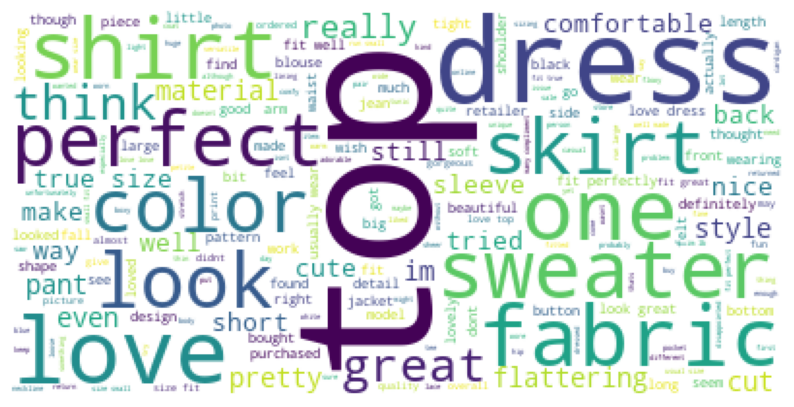

In [95]:
wordcloud = WordCloud(background_color="white", max_words =250).generate(all_words)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

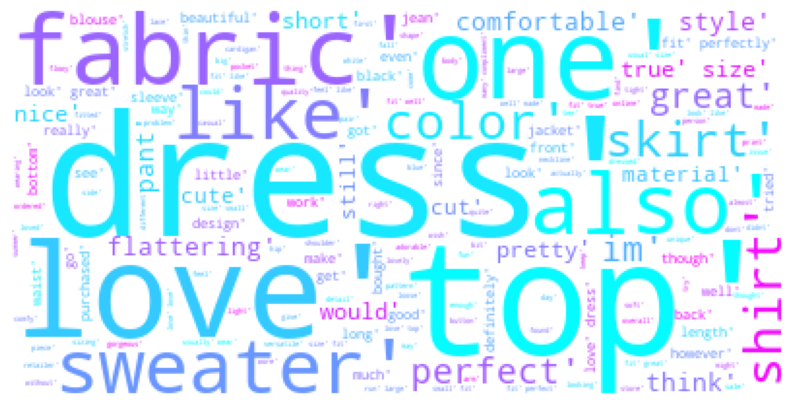

In [96]:
wordcloud = WordCloud(background_color="white", max_words =250, colormap='cool').generate(str(pos_words))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

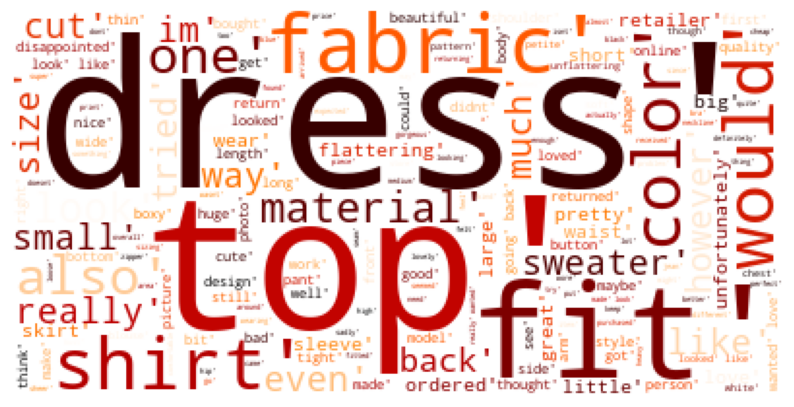

In [97]:
wordcloud = WordCloud(background_color="white", max_words =250, colormap='gist_heat').generate(str(neg_words))

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Train | Test & Split

In [98]:
rev_df.head()

,review_text,recommend_flag
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


In [99]:
X = rev_df["review_text"]
y= rev_df["recommend_flag"]

In [100]:
X.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: review_text, dtype: object

In [101]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: recommend_flag, dtype: int64

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [103]:
X_train.shape

(18112,)

In [104]:
X_test.shape

(4529,)

## Count Vectorization

In [105]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [106]:
type(X_train_count)

scipy.sparse._csr.csr_matrix

In [107]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [108]:
vectorizer.get_feature_names_out()

array(['aa', 'ab', 'abby', ..., 'zone', 'zoom', 'ãâ'], dtype=object)

In [109]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,abovetheknee,absolute,absolutely,...,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom,ãâ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF Vectorization

In [110]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [111]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,abovetheknee,absolute,absolutely,...,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom,ãâ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## MACHINE LEARNING MODELLING

In [113]:
def eval(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    
    fig, ax = plt.subplots(figsize=(7, 7))
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax)
    plt.show()

## LogisticRegression

### Logistic Regression With Count Vectorizor

In [114]:
model = LogisticRegression(C=0.6, max_iter=1000, class_weight="balanced", random_state=101)
model.fit(X_train_count, y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOGISTIC REGRESSION MODEL - Count Vectorizor
*******************************************************
Test_Set
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       820
           1       0.95      0.89      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.84      0.81      4529
weighted avg       0.89      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.72      0.96      0.82      3281
           1       0.99      0.92      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.85      0.94      0.89     18112
weighted avg       0.94      0.92      0.93     18112



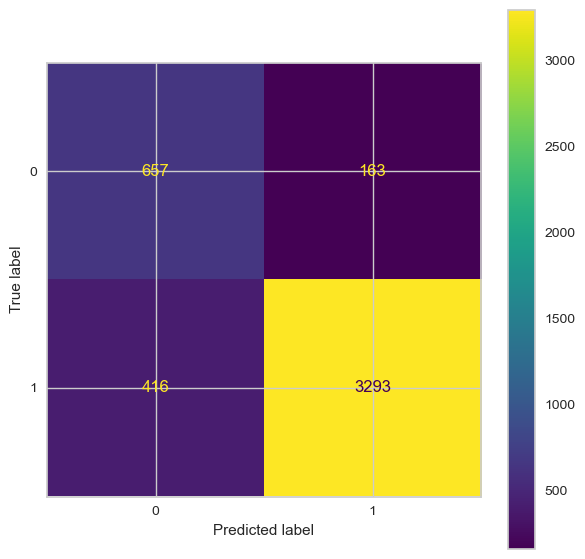

In [115]:
print("LOGISTIC REGRESSION MODEL - Count Vectorizor")
print(colored('*'*55, 'green', attrs=['bold']), sep='')
eval(model, X_train_count, X_test_count, y_train, y_test)

In [116]:
y_pred_train = model.predict(X_train_count)
y_pred_test = model.predict(X_test_count)

In [117]:
# Calculate scores for the training set

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')

In [118]:
# Calculate scores for the test set

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

In [119]:
print("Training Set Scores-Count Vectorizor:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}\n")
print(colored('-'*35, 'red', attrs=['bold']), sep='')
print("Test Set Scores-Count Vectorizor:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Training Set Scores-Count Vectorizor:
********************
Accuracy: 0.9243
Precision: 0.9407
Recall: 0.9243
F1 Score: 0.9283

-----------------------------------
Test Set Scores-Count Vectorizor:
********************
Accuracy: 0.8722
Precision: 0.8912
Recall: 0.8722
F1 Score: 0.8784


C:\Users\sandisk\AnacondaPy\Lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


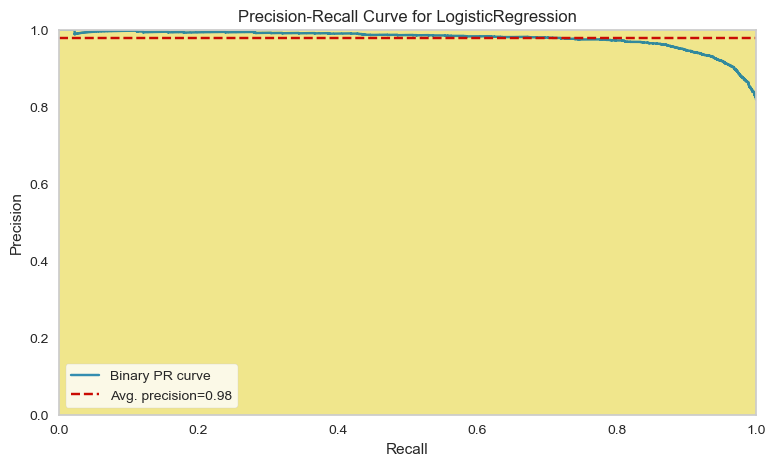

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [120]:
viz = PrecisionRecallCurve(model, classes=model.classes_, per_class=True, cmap="Set1")

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_facecolor('khaki')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show()

In [121]:
log_AP_count = viz.score_

In [122]:
log_AP_count

0.9776373956817292

### Logistic Regression With TF-IDF Vectorizer

In [123]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOGISTIC REGRESSION MODEL-TF-IDF Vectorizer
*******************************************************
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.86      0.67       820
           1       0.97      0.85      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.57      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



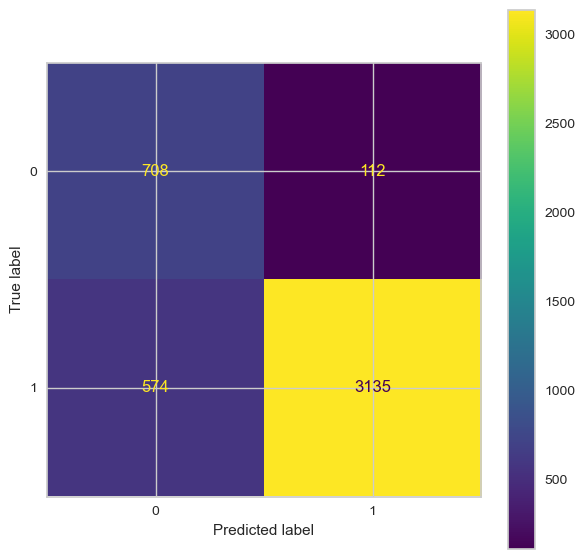

In [124]:
print("LOGISTIC REGRESSION MODEL-TF-IDF Vectorizer")
print(colored('*'*55, 'green', attrs=['bold']), sep='')
eval(log, X_train_tf_idf, X_test_tf_idf, y_train, y_test)

In [125]:
y_pred_train_tf = model.predict(X_train_tf_idf)
y_pred_test_tf = model.predict(X_test_tf_idf)

In [126]:
# Calculate scores for the training set

train_accuracy_tf = accuracy_score(y_train, y_pred_train_tf)
train_precision_tf = precision_score(y_train, y_pred_train_tf, average='weighted')
train_recall_tf = recall_score(y_train, y_pred_train_tf, average='weighted')
train_f1_tf = f1_score(y_train, y_pred_train_tf, average='weighted')

In [127]:
# Calculate scores for the test set

test_accuracy_tf = accuracy_score(y_test, y_pred_test_tf)
test_precision_tf = precision_score(y_test, y_pred_test_tf, average='weighted')
test_recall_tf = recall_score(y_test, y_pred_test_tf, average='weighted')
test_f1_tf = f1_score(y_test, y_pred_test_tf, average='weighted')

In [128]:
print("Training Set Scores-TF-IDF Vectorizer:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {train_accuracy_tf:.4f}")
print(f"Precision: {train_precision_tf:.4f}")
print(f"Recall: {train_recall_tf:.4f}")
print(f"F1 Score: {train_f1_tf:.4f}\n")
print(colored('-'*35, 'red', attrs=['bold']), sep='')
print("Test Set Scores-TF-IDF Vectorizer:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {test_accuracy_tf:.4f}")
print(f"Precision: {test_precision_tf:.4f}")
print(f"Recall: {test_recall_tf:.4f}")
print(f"F1 Score: {test_f1_tf:.4f}")

Training Set Scores-TF-IDF Vectorizer:
********************
Accuracy: 0.8773
Precision: 0.9243
Recall: 0.8773
F1 Score: 0.8876

-----------------------------------
Test Set Scores-TF-IDF Vectorizer:
********************
Accuracy: 0.8269
Precision: 0.8815
Recall: 0.8269
F1 Score: 0.8417


C:\Users\sandisk\AnacondaPy\Lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


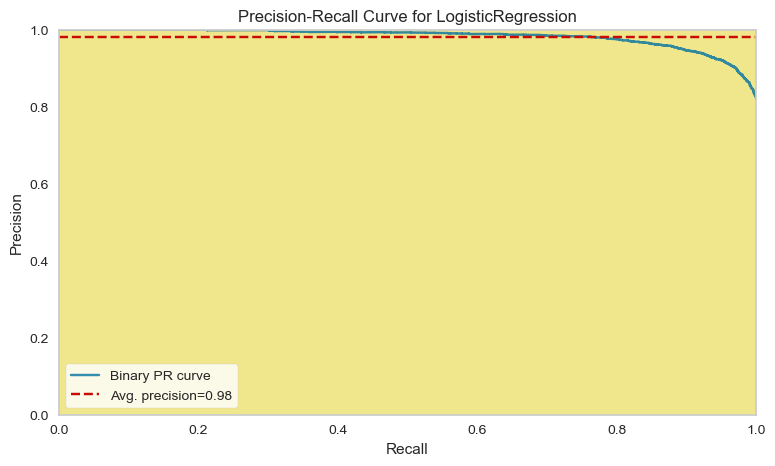

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [129]:
viz = PrecisionRecallCurve(log, classes=log.classes_, per_class=True, cmap="Set1")

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_facecolor('khaki')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

## Naive Bayes

### Naive Bayes With Count Vectorizor

In [130]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

NAIVE BAYES MODEL - Count Vectorizor
*******************************************************
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.80      0.83      0.81      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.83      0.87      0.85     18112
weighted avg       0.91      0.90      0.91     18112



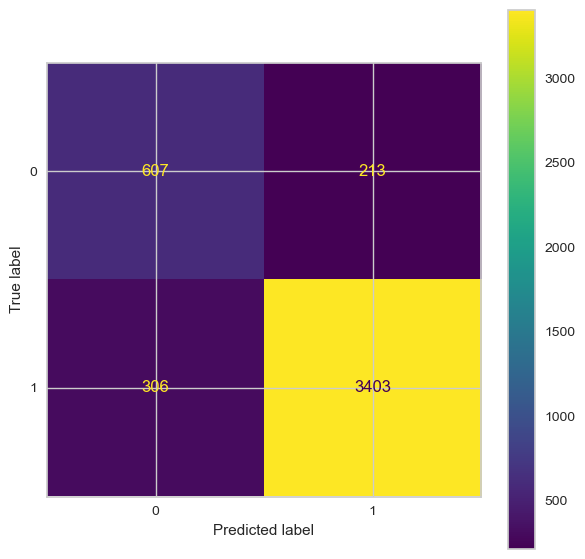

In [131]:
print("NAIVE BAYES MODEL - Count Vectorizor")
print(colored('*'*55, 'green', attrs=['bold']), sep='')
eval(nb, X_train_count, X_test_count,y_train, y_test)

In [132]:
y_pred_train = nb.predict(X_train_count)
y_pred_test = nb.predict(X_test_count)

In [133]:
# Calculate scores for the training set

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')

In [134]:
# Calculate scores for the test set

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

In [135]:
print("Training Set Scores-Count Vectorizor:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}\n")
print(colored('-'*35, 'red', attrs=['bold']), sep='')
print("Test Set Scores-Count Vectorizor:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Training Set Scores-Count Vectorizor:
********************
Accuracy: 0.9032
Precision: 0.9107
Recall: 0.9032
F1 Score: 0.9059

-----------------------------------
Test Set Scores-Count Vectorizor:
********************
Accuracy: 0.8854
Precision: 0.8911
Recall: 0.8854
F1 Score: 0.8878


C:\Users\sandisk\AnacondaPy\Lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


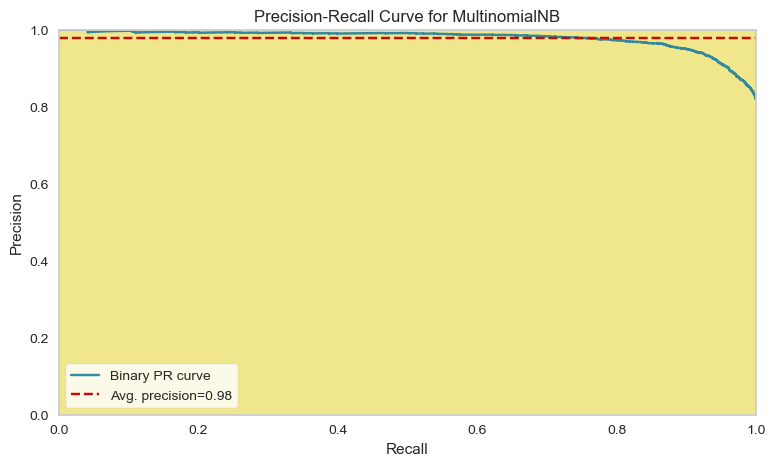

<Axes: title={'center': 'Precision-Recall Curve for MultinomialNB'}, xlabel='Recall', ylabel='Precision'>

In [136]:
viz = PrecisionRecallCurve(nb, classes= nb.classes_, per_class=True, cmap="Set1")

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_facecolor('khaki')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show()

In [137]:
nb_AP_count = viz.score_

#### Naive Bayes With TF-IDF Vectorizer

In [138]:
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

NAIVE BAYES MODEL-TF-IDF Vectorizer
*******************************************************
Test_Set
              precision    recall  f1-score   support

           0       0.87      0.16      0.28       820
           1       0.84      0.99      0.91      3709

    accuracy                           0.84      4529
   macro avg       0.85      0.58      0.59      4529
weighted avg       0.85      0.84      0.80      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.22      0.36      3281
           1       0.85      1.00      0.92     14831

    accuracy                           0.86     18112
   macro avg       0.90      0.61      0.64     18112
weighted avg       0.87      0.86      0.82     18112



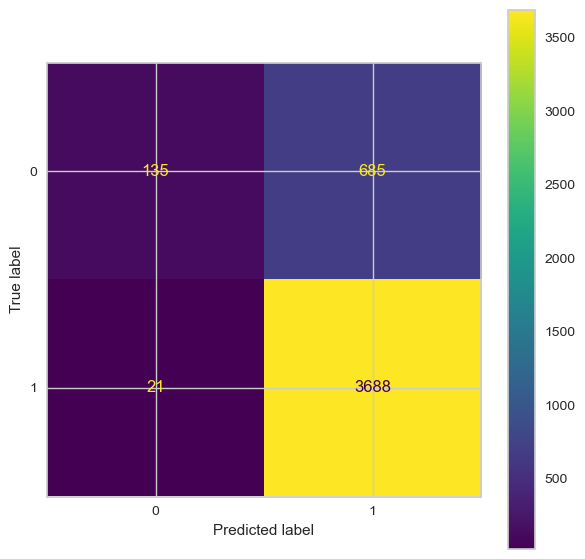

In [139]:
print("NAIVE BAYES MODEL-TF-IDF Vectorizer")
print(colored('*'*55, 'green', attrs=['bold']), sep='')
eval(nb, X_train_tf_idf, X_test_tf_idf, y_train, y_test)

In [140]:
y_pred_train_tf = nb.predict(X_train_tf_idf)
y_pred_test_tf = nb.predict(X_test_tf_idf)

In [141]:
# Calculate scores for the training set

train_accuracy_tf = accuracy_score(y_train, y_pred_train_tf)
train_precision_tf = precision_score(y_train, y_pred_train_tf, average='weighted')
train_recall_tf = recall_score(y_train, y_pred_train_tf, average='weighted')
train_f1_tf = f1_score(y_train, y_pred_train_tf, average='weighted')

In [142]:
# Calculate scores for the test set

test_accuracy_tf = accuracy_score(y_test, y_pred_test_tf)
test_precision_tf = precision_score(y_test, y_pred_test_tf, average='weighted')
test_recall_tf = recall_score(y_test, y_pred_test_tf, average='weighted')
test_f1_tf = f1_score(y_test, y_pred_test_tf, average='weighted')

In [143]:
print("Training Set Scores-TF-IDF Vectorizer:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {train_accuracy_tf:.4f}")
print(f"Precision: {train_precision_tf:.4f}")
print(f"Recall: {train_recall_tf:.4f}")
print(f"F1 Score: {train_f1_tf:.4f}\n")
print(colored('-'*35, 'red', attrs=['bold']), sep='')
print("Test Set Scores-TF-IDF Vectorizer:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {test_accuracy_tf:.4f}")
print(f"Precision: {test_precision_tf:.4f}")
print(f"Recall: {test_recall_tf:.4f}")
print(f"F1 Score: {test_f1_tf:.4f}")

Training Set Scores-TF-IDF Vectorizer:
********************
Accuracy: 0.8568
Precision: 0.8706
Recall: 0.8568
F1 Score: 0.8178

-----------------------------------
Test Set Scores-TF-IDF Vectorizer:
********************
Accuracy: 0.8441
Precision: 0.8473
Recall: 0.8441
F1 Score: 0.7975


C:\Users\sandisk\AnacondaPy\Lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


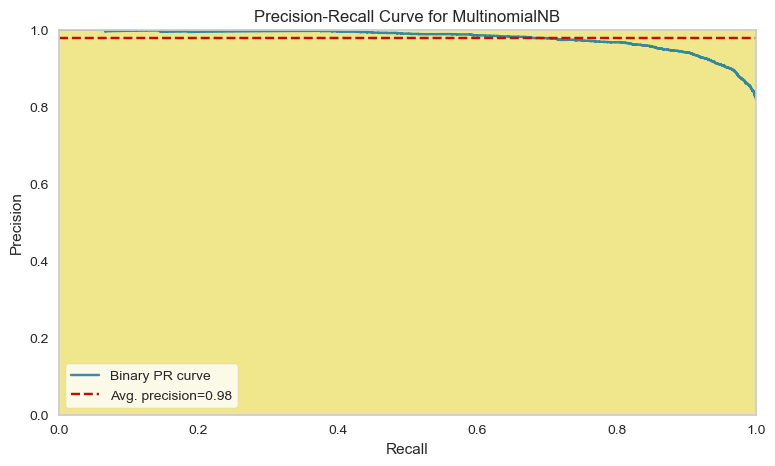

<Axes: title={'center': 'Precision-Recall Curve for MultinomialNB'}, xlabel='Recall', ylabel='Precision'>

In [144]:
viz = PrecisionRecallCurve(nb, classes=nb.classes_, per_class=True, cmap="Set1")

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_facecolor('khaki')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [145]:
nb_AP_tfidf = viz.score_

## Support Vector Machine (SVM)

#### Support Vector Machine (SVM) With Count Vectorizor

In [146]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

C:\Users\sandisk\AnacondaPy\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL - Count Vectorizor
*******************************************************
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.84      0.70       820
           1       0.96      0.87      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      3281
           1       0.98      0.89      0.93     14831

    accuracy                           0.90     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112



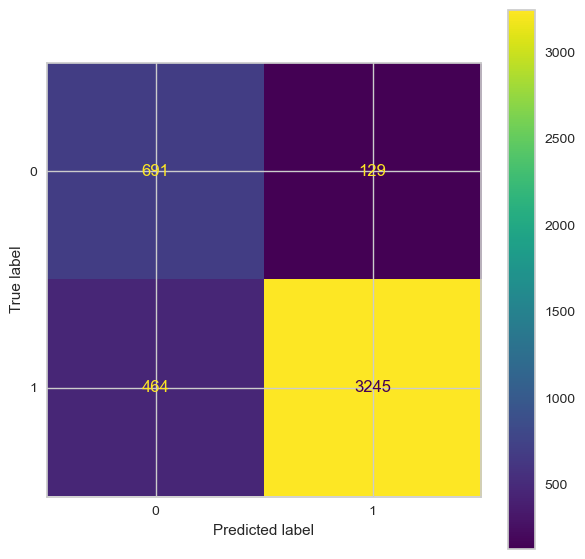

In [147]:
print("SVC MODEL - Count Vectorizor")
print(colored('*'*55, 'green', attrs=['bold']), sep='')
eval(svc, X_train_count, X_test_count, y_train, y_test)

In [148]:
y_pred_train = svc.predict(X_train_count)
y_pred_test = svc.predict(X_test_count)

In [149]:
# Calculate scores for the training set

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')

In [150]:
# Calculate scores for the test set

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

In [151]:
print("Training Set Scores-Count Vectorizor:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}\n")
print(colored('-'*35, 'red', attrs=['bold']), sep='')
print("Test Set Scores-Count Vectorizor:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Training Set Scores-Count Vectorizor:
********************
Accuracy: 0.8952
Precision: 0.9210
Recall: 0.8952
F1 Score: 0.9018

-----------------------------------
Test Set Scores-Count Vectorizor:
********************
Accuracy: 0.8691
Precision: 0.8960
Recall: 0.8691
F1 Score: 0.8771


C:\Users\sandisk\AnacondaPy\Lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


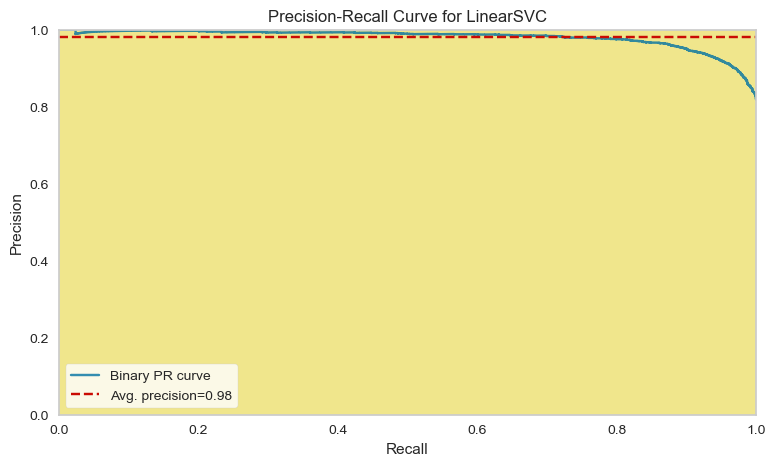

<Axes: title={'center': 'Precision-Recall Curve for LinearSVC'}, xlabel='Recall', ylabel='Precision'>

In [152]:
viz = PrecisionRecallCurve(svc, classes=svc.classes_, per_class=True, cmap="Set1")

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_facecolor('khaki')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show()

In [153]:
svc_AP_count = viz.score_

#### Support Vector Machine (SVM) With TF-IDF Vectorizer

In [154]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)

svc.fit(X_train_tf_idf, y_train)

C:\Users\sandisk\AnacondaPy\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL-TF-IDF Vectorizer
*******************************************************
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.87      0.67       820
           1       0.97      0.84      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



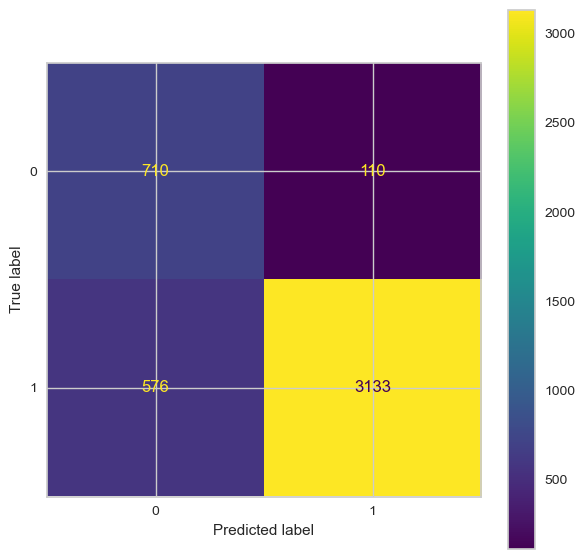

In [155]:
print("SVC MODEL-TF-IDF Vectorizer")
print(colored('*'*55, 'green', attrs=['bold']), sep='')
eval(svc, X_train_tf_idf, X_test_tf_idf, y_train, y_test)

In [156]:
y_pred_train_tf = svc.predict(X_train_tf_idf)
y_pred_test_tf = svc.predict(X_test_tf_idf)

In [157]:
# Calculate scores for the training set

train_accuracy_tf = accuracy_score(y_train, y_pred_train_tf)
train_precision_tf = precision_score(y_train, y_pred_train_tf, average='weighted')
train_recall_tf = recall_score(y_train, y_pred_train_tf, average='weighted')
train_f1_tf = f1_score(y_train, y_pred_train_tf, average='weighted')

In [158]:
# Calculate scores for the test set

test_accuracy_tf = accuracy_score(y_test, y_pred_test_tf)
test_precision_tf = precision_score(y_test, y_pred_test_tf, average='weighted')
test_recall_tf = recall_score(y_test, y_pred_test_tf, average='weighted')
test_f1_tf = f1_score(y_test, y_pred_test_tf, average='weighted')

In [159]:
print("Training Set Scores-TF-IDF Vectorizer:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {train_accuracy_tf:.4f}")
print(f"Precision: {train_precision_tf:.4f}")
print(f"Recall: {train_recall_tf:.4f}")
print(f"F1 Score: {train_f1_tf:.4f}\n")
print(colored('-'*35, 'red', attrs=['bold']), sep='')
print("Test Set Scores-TF-IDF Vectorizer:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {test_accuracy_tf:.4f}")
print(f"Precision: {test_precision_tf:.4f}")
print(f"Recall: {test_recall_tf:.4f}")
print(f"F1 Score: {test_f1_tf:.4f}")

Training Set Scores-TF-IDF Vectorizer:
********************
Accuracy: 0.8558
Precision: 0.8983
Recall: 0.8558
F1 Score: 0.8670

-----------------------------------
Test Set Scores-TF-IDF Vectorizer:
********************
Accuracy: 0.8485
Precision: 0.8911
Recall: 0.8485
F1 Score: 0.8602


C:\Users\sandisk\AnacondaPy\Lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


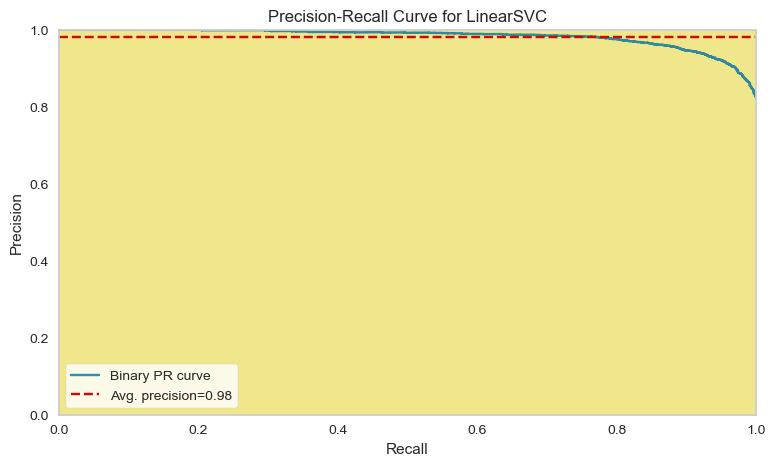

<Axes: title={'center': 'Precision-Recall Curve for LinearSVC'}, xlabel='Recall', ylabel='Precision'>

In [160]:
viz = PrecisionRecallCurve(svc, classes=svc.classes_, per_class=True, cmap="Set1")

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_facecolor('khaki')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [161]:
svc_AP_tfidf = viz.score_

## Random Forest

#### Random Forest With Count Vectorizer

In [162]:
rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

RANDOM FOREST MODEL - Count Vectorizor
*******************************************************
Test_Set
              precision    recall  f1-score   support

           0       0.57      0.79      0.66       820
           1       0.95      0.87      0.91      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.83      0.78      4529
weighted avg       0.88      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.64      0.89      0.74      3281
           1       0.97      0.89      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.81      0.89      0.84     18112
weighted avg       0.91      0.89      0.90     18112



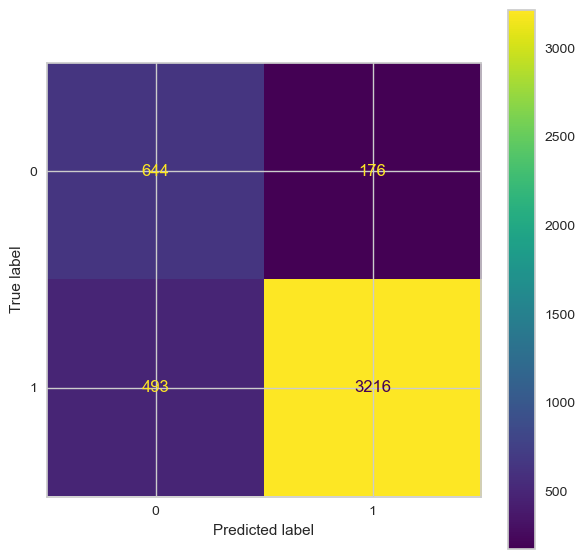

In [163]:
print("RANDOM FOREST MODEL - Count Vectorizor")
print(colored('*'*55, 'green', attrs=['bold']), sep='')
eval(rf, X_train_count, X_test_count, y_train, y_test)

In [164]:
y_pred_train = rf.predict(X_train_count)
y_pred_test = rf.predict(X_test_count)

In [165]:
# Calculate scores for the training set

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')

In [166]:
# Calculate scores for the test set

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

In [167]:
print("Training Set Scores-Count Vectorizor:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}\n")
print(colored('-'*35, 'red', attrs=['bold']), sep='')
print("Test Set Scores-Count Vectorizor:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Training Set Scores-Count Vectorizor:
********************
Accuracy: 0.8893
Precision: 0.9127
Recall: 0.8893
F1 Score: 0.8958

-----------------------------------
Test Set Scores-Count Vectorizor:
********************
Accuracy: 0.8523
Precision: 0.8790
Recall: 0.8523
F1 Score: 0.8610


C:\Users\sandisk\AnacondaPy\Lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


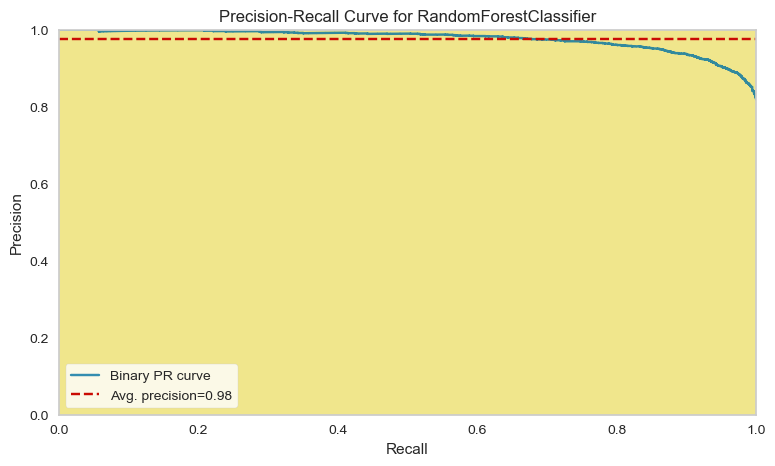

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [168]:
viz = PrecisionRecallCurve(rf, classes=rf.classes_, per_class=True, cmap="Set1")

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_facecolor('khaki')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show()

In [169]:
rf_AP_count = viz.score_

#### Random Forest With TF-IDF Vectorizer

In [170]:
rf = RandomForestClassifier(200, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")

rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

RANDOM FOREST MODEL-TF-IDF Vectorizer
*******************************************************
Test_Set
              precision    recall  f1-score   support

           0       0.53      0.79      0.63       820
           1       0.95      0.84      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.74      0.82      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.59      0.90      0.72      3281
           1       0.98      0.86      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.78      0.88      0.82     18112
weighted avg       0.91      0.87      0.88     18112



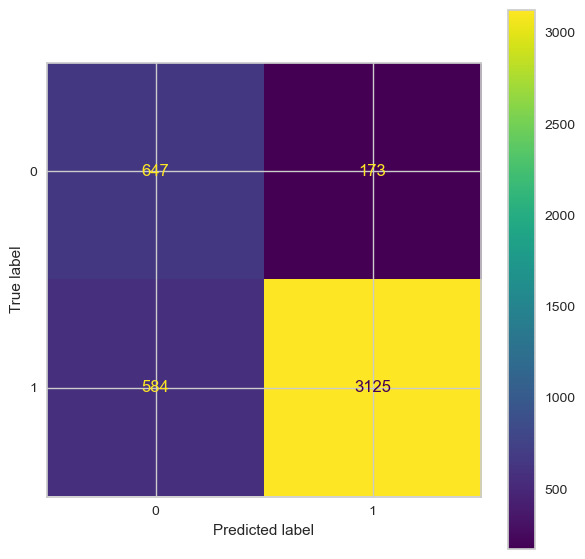

In [171]:
print("RANDOM FOREST MODEL-TF-IDF Vectorizer")
print(colored('*'*55, 'green', attrs=['bold']), sep='')
eval(rf, X_train_tf_idf, X_test_tf_idf, y_train, y_test)

In [172]:
y_pred_train_tf = rf.predict(X_train_tf_idf)
y_pred_test_tf = rf.predict(X_test_tf_idf)

In [173]:
# Calculate scores for the training set

train_accuracy_tf = accuracy_score(y_train, y_pred_train_tf)
train_precision_tf = precision_score(y_train, y_pred_train_tf, average='weighted')
train_recall_tf = recall_score(y_train, y_pred_train_tf, average='weighted')
train_f1_tf = f1_score(y_train, y_pred_train_tf, average='weighted')

In [174]:
# Calculate scores for the test set

test_accuracy_tf = accuracy_score(y_test, y_pred_test_tf)
test_precision_tf = precision_score(y_test, y_pred_test_tf, average='weighted')
test_recall_tf = recall_score(y_test, y_pred_test_tf, average='weighted')
test_f1_tf = f1_score(y_test, y_pred_test_tf, average='weighted')

In [175]:
print("Training Set Scores-TF-IDF Vectorizer:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {train_accuracy_tf:.4f}")
print(f"Precision: {train_precision_tf:.4f}")
print(f"Recall: {train_recall_tf:.4f}")
print(f"F1 Score: {train_f1_tf:.4f}\n")
print(colored('-'*35, 'red', attrs=['bold']), sep='')
print("Test Set Scores-TF-IDF Vectorizer:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {test_accuracy_tf:.4f}")
print(f"Precision: {test_precision_tf:.4f}")
print(f"Recall: {test_recall_tf:.4f}")
print(f"F1 Score: {test_f1_tf:.4f}")

Training Set Scores-TF-IDF Vectorizer:
********************
Accuracy: 0.8705
Precision: 0.9066
Recall: 0.8705
F1 Score: 0.8799

-----------------------------------
Test Set Scores-TF-IDF Vectorizer:
********************
Accuracy: 0.8329
Precision: 0.8711
Recall: 0.8329
F1 Score: 0.8447


C:\Users\sandisk\AnacondaPy\Lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


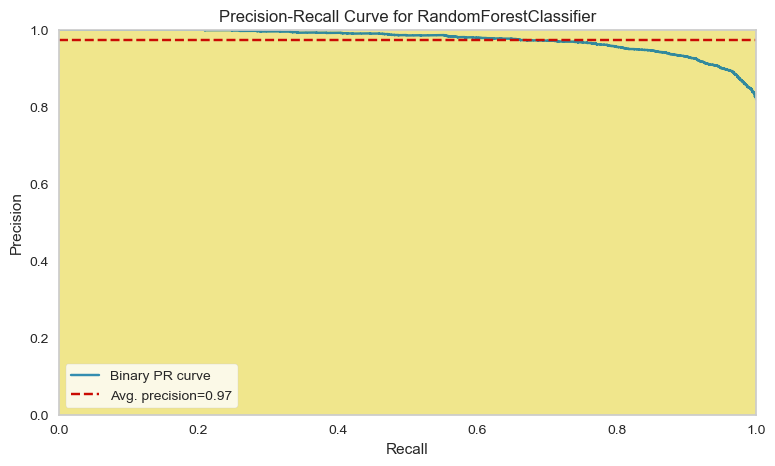

<Axes: title={'center': 'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [176]:
viz = PrecisionRecallCurve(rf, classes=rf.classes_, per_class=True, cmap="Set1")

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_facecolor('khaki')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

## Ada Boosting

#### Ada Boosting With TF-IDF Vectorizer

In [177]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

ADA BOOST MODEL - Count Vectorizor
*******************************************************
Test_Set
              precision    recall  f1-score   support

           0       0.72      0.57      0.64       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.82      0.76      0.78      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.80      0.65      0.72      3281
           1       0.93      0.96      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.86      0.81      0.83     18112
weighted avg       0.90      0.91      0.90     18112



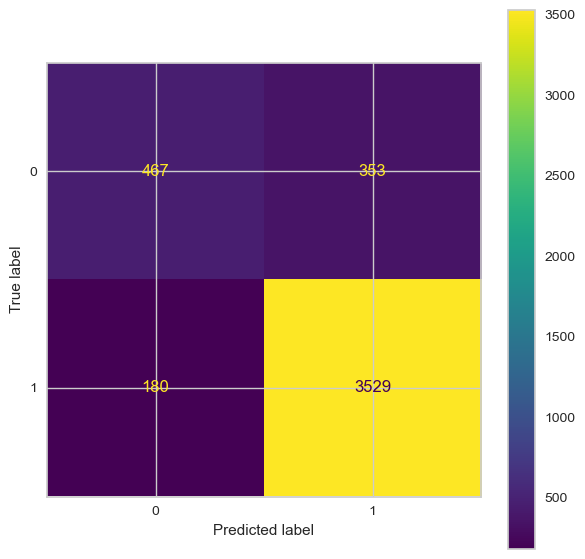

In [178]:
print("ADA BOOST MODEL - Count Vectorizor")
print(colored('*'*55, 'green', attrs=['bold']), sep='')
eval(ada, X_train_count, X_test_count, y_train, y_test)

In [179]:
y_pred_train = ada.predict(X_train_count)
y_pred_test = ada.predict(X_test_count)

In [180]:
# Calculate scores for the training set

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')

In [181]:
# Calculate scores for the test set

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

In [182]:
print("Training Set Scores-Count Vectorizor:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}\n")
print(colored('-'*35, 'red', attrs=['bold']), sep='')
print("Test Set Scores-Count Vectorizor:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")

Training Set Scores-Count Vectorizor:
********************
Accuracy: 0.9080
Precision: 0.9039
Recall: 0.9080
F1 Score: 0.9043

-----------------------------------
Test Set Scores-Count Vectorizor:
********************
Accuracy: 0.8823
Precision: 0.8752
Recall: 0.8823
F1 Score: 0.8767


C:\Users\sandisk\AnacondaPy\Lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


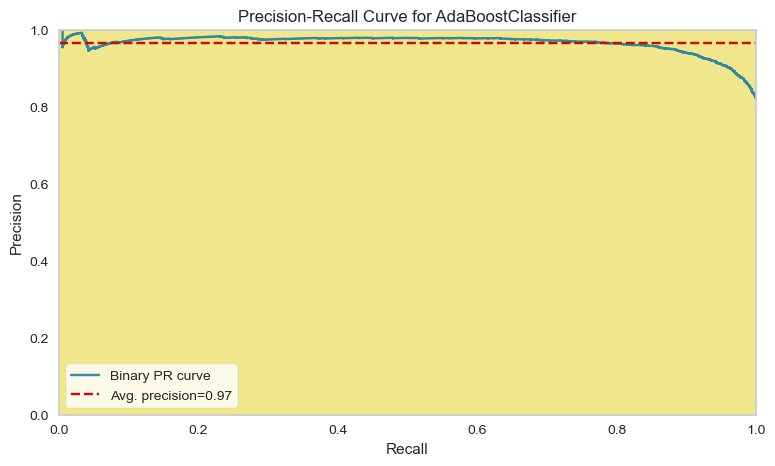

<Axes: title={'center': 'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [183]:
viz = PrecisionRecallCurve(ada, classes=ada.classes_, per_class=True, cmap="Set1")

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_facecolor('khaki')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show()

In [184]:
ada_AP_count = viz.score_

#### Ada Boosting With TF-IDF Vectorizer

In [185]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)

ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

ADA BOOST MODEL-TF-IDF Vectorizer
*******************************************************
Test_Set
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.81      0.76      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.82      0.70      0.76      3281
           1       0.94      0.97      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.88      0.83      0.85     18112
weighted avg       0.91      0.92      0.92     18112



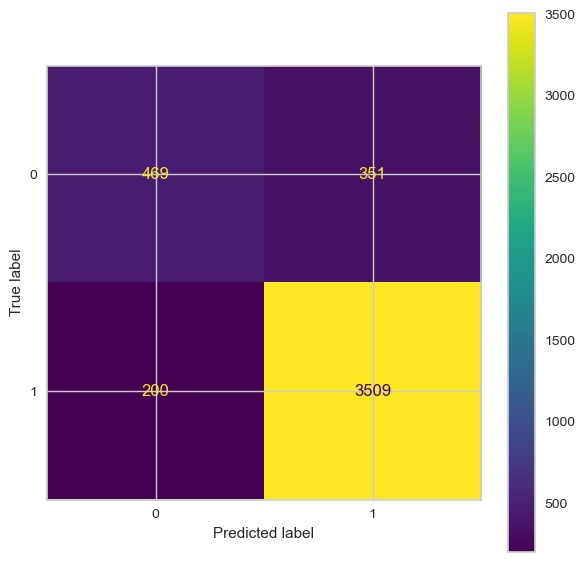

In [186]:
print("ADA BOOST MODEL-TF-IDF Vectorizer")
print(colored('*'*55, 'green', attrs=['bold']), sep='')
eval(ada, X_train_tf_idf, X_test_tf_idf, y_train, y_test)

In [187]:
y_pred_train_tf = ada.predict(X_train_tf_idf)
y_pred_test_tf = ada.predict(X_test_tf_idf)

In [188]:
# Calculate scores for the training set

train_accuracy_tf = accuracy_score(y_train, y_pred_train_tf)
train_precision_tf = precision_score(y_train, y_pred_train_tf, average='weighted')
train_recall_tf = recall_score(y_train, y_pred_train_tf, average='weighted')
train_f1_tf = f1_score(y_train, y_pred_train_tf, average='weighted')

In [189]:
# Calculate scores for the test set

test_accuracy_tf = accuracy_score(y_test, y_pred_test_tf)
test_precision_tf = precision_score(y_test, y_pred_test_tf, average='weighted')
test_recall_tf = recall_score(y_test, y_pred_test_tf, average='weighted')
test_f1_tf = f1_score(y_test, y_pred_test_tf, average='weighted')

In [190]:
print("Training Set Scores-TF-IDF Vectorizer:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {train_accuracy_tf:.4f}")
print(f"Precision: {train_precision_tf:.4f}")
print(f"Recall: {train_recall_tf:.4f}")
print(f"F1 Score: {train_f1_tf:.4f}\n")
print(colored('-'*35, 'red', attrs=['bold']), sep='')
print("Test Set Scores-TF-IDF Vectorizer:")
print(colored('*'*20, 'green', attrs=['bold']), sep='')
print(f"Accuracy: {test_accuracy_tf:.4f}")
print(f"Precision: {test_precision_tf:.4f}")
print(f"Recall: {test_recall_tf:.4f}")
print(f"F1 Score: {test_f1_tf:.4f}")

Training Set Scores-TF-IDF Vectorizer:
********************
Accuracy: 0.9177
Precision: 0.9146
Recall: 0.9177
F1 Score: 0.9152

-----------------------------------
Test Set Scores-TF-IDF Vectorizer:
********************
Accuracy: 0.8783
Precision: 0.8714
Recall: 0.8783
F1 Score: 0.8734


C:\Users\sandisk\AnacondaPy\Lib\site-packages\yellowbrick\classifier\prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


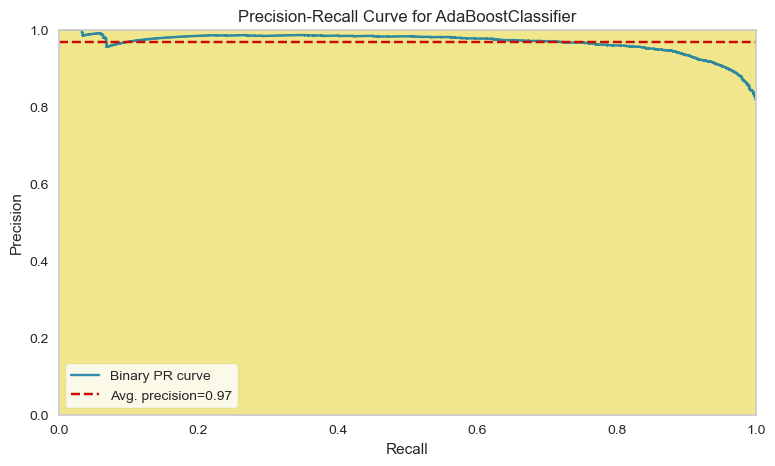

<Axes: title={'center': 'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [191]:
viz = PrecisionRecallCurve(ada, classes=ada.classes_, per_class=True, cmap="Set1")

fig, ax = plt.subplots(figsize=(9, 5))
ax.set_facecolor('khaki')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [192]:
ada_AP_tfidf = viz.score_

## Tokenization

In [193]:
text = re.sub('[^\w\s]','', str(rev_df["review_text"]))
text

'0              absolutely wonderful silky sexy comfortable\n1        love dress sooo pretty happened find store im \n2        high hope dress really wanted work initially o\n3        love love love jumpsuit fun flirty fabulous ev\n4        shirt flattering due adjustable front tie perf\n                                                       \n23481    happy snag dress great price easy slip flatter\n23482    reminds maternity clothes soft stretchy shiny \n23483    fit well top see never would worked im glad ab\n23484    bought dress wedding summer cute unfortunately\n23485    dress lovely feminine fit perfectly easy wear \nName review_text Length 22641 dtype object'

In [194]:
text_tokens = word_tokenize(txt.lower()) 
text_tokens

['0',
 'absolutely',
 'wonderful',
 'silky',
 'and',
 'sexy',
 'and',
 'comf',
 '1',
 'love',
 'this',
 'dress',
 'its',
 'sooo',
 'pretty',
 'i',
 'happene',
 '2',
 'i',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'reall',
 '3',
 'i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'fl',
 '4',
 'this',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'th',
 '23481',
 'i',
 'was',
 'very',
 'happy',
 'to',
 'snag',
 'this',
 'dress',
 'at',
 'such',
 'a',
 '23482',
 'it',
 'reminds',
 'me',
 'of',
 'maternity',
 'clothes',
 'soft',
 'stre',
 '23483',
 'this',
 'fit',
 'well',
 'but',
 'the',
 'top',
 'was',
 'very',
 'see',
 'throug',
 '23484',
 'i',
 'bought',
 'this',
 'dress',
 'for',
 'a',
 'wedding',
 'i',
 'have',
 'this',
 '23485',
 'this',
 'dress',
 'in',
 'a',
 'lovely',
 'platinum',
 'is',
 'feminine',
 'an',
 'name',
 'review_text',
 'length',
 '22641',
 'dtype',
 'object']